In [1]:
import pathlib
import sys
import numpy as np
import pickle
import time

from sklearn.model_selection import ParameterGrid

from tqdm import tqdm

sys.path.append(str(pathlib.Path("../..").resolve()))


from source.data import (
    create_splits,
    explode_multiple_locc,
    get_label_to_index_mapping,
)
from source.files import get_book_text, get_embedding
from source.metrics import calculate_flat_binary_metrics
from source.predict import predict
from source.models.xgbhi import (
    create_xgbhi_tfidf_model,
    create_xgbhi_multi_model,
)

/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oleksandr/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/oleksandr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/oleksandr/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/oleksandr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/oleksandr/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading p

In [2]:
splits = create_splits(verbose=False)
X_train, X_test, y_train, y_test = splits

In [3]:
labels, lti, itl = get_label_to_index_mapping(splits)

In [7]:
param_grid = {
    "n_estimators": [1000, 2000, 3000, 4000],
    "learning_rate": [0.1, 0.2, 0.3, 0.4],
    "max_depth": [3, 5, 7],
}

In [4]:
results = []

In [5]:
with open("results_xgbhi.pkl", "rb") as f:
    results = pickle.load(f)

0 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 1000}


100%|██████████| 13898/13898 [00:02<00:00, 6218.44it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.88      0.77      0.82       693
           B       0.85      0.81      0.83      1190
           D       0.84      0.82      0.83      2920
          DI       0.86      0.74      0.80      1189
           O       0.81      0.65      0.72      1803
           P       0.91      0.93      0.92      6657
          PR       0.76      0.60      0.67      1789
          PS       0.77      0.57      0.65      1777
          PZ       0.79      0.72      0.76      1773
           Q       0.84      0.77      0.80       679

   micro avg       0.85      0.78      0.82     20470
   macro avg       0.83      0.74      0.78     20470
weighted avg       0.85      0.78      0.81     20470
 samples avg       0.81      0.78      0.79     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


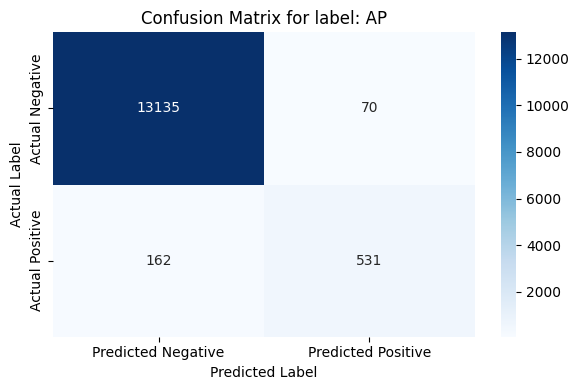

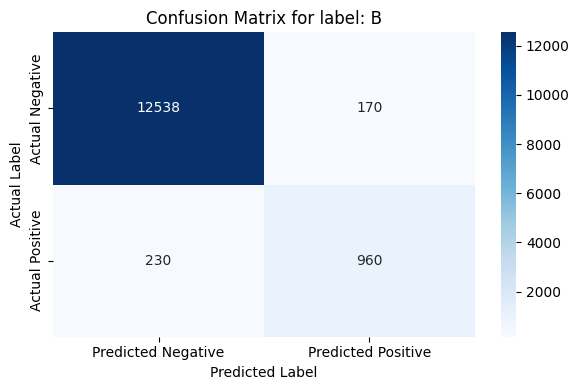

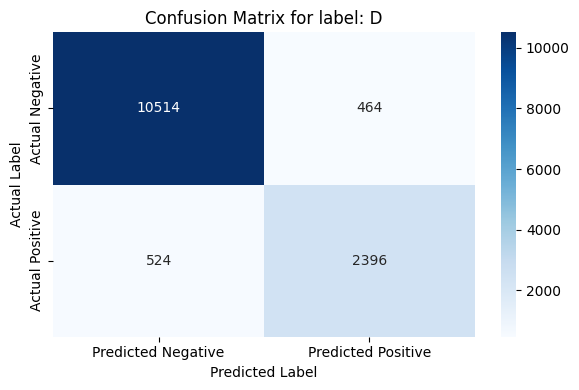

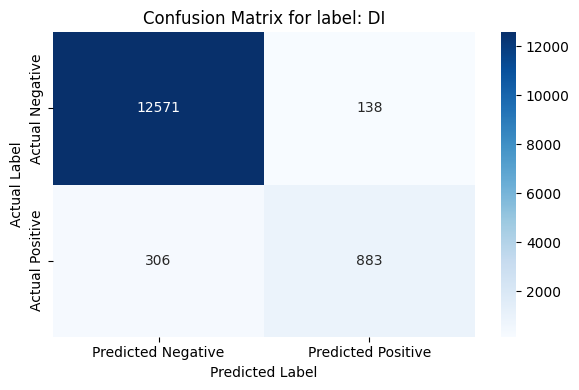

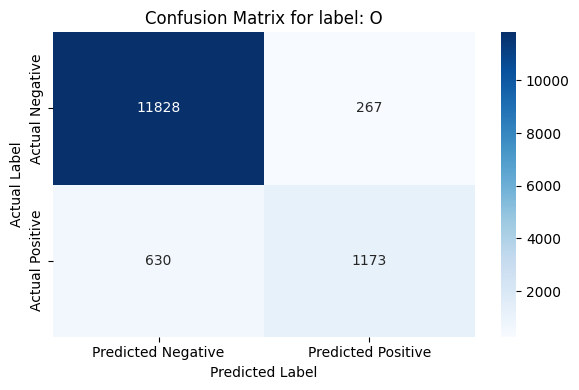

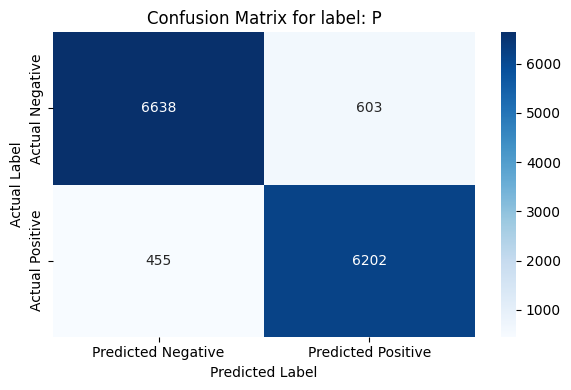

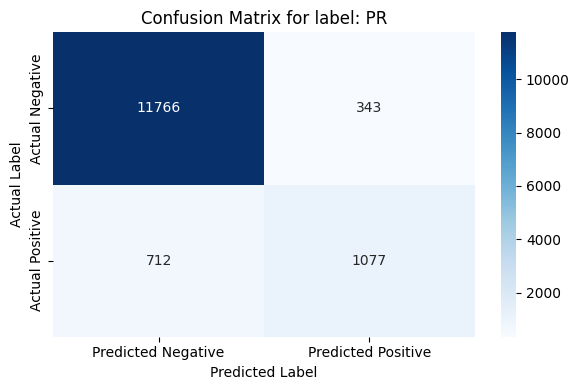

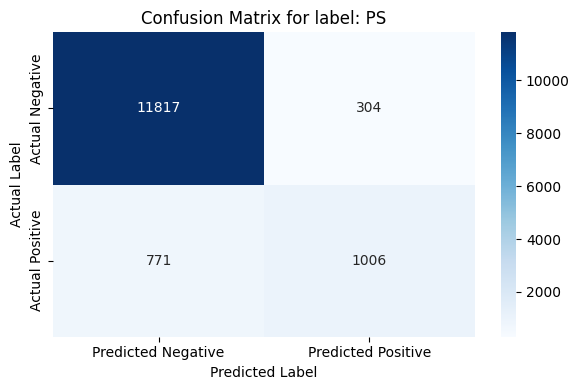

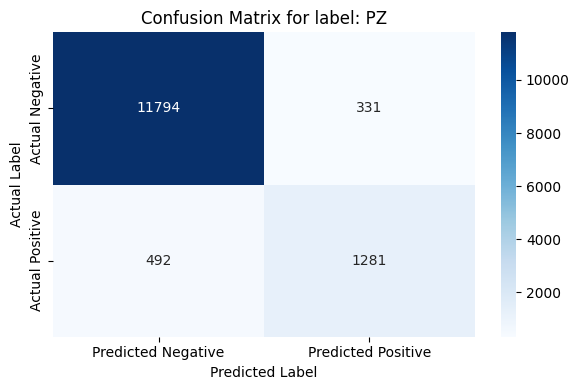

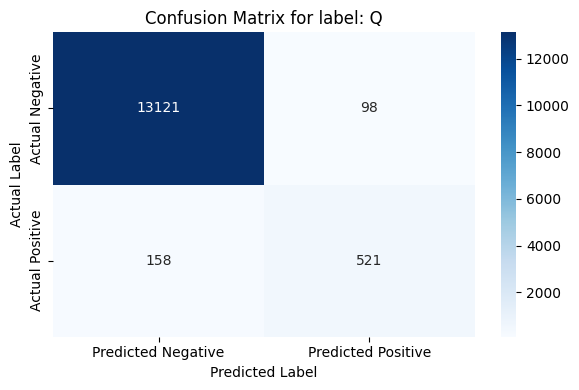

1 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 2000}


100%|██████████| 13898/13898 [00:02<00:00, 6438.38it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.88      0.77      0.82       693
           B       0.85      0.81      0.83      1190
           D       0.84      0.82      0.83      2920
          DI       0.87      0.74      0.80      1189
           O       0.81      0.65      0.72      1803
           P       0.91      0.93      0.92      6657
          PR       0.76      0.61      0.67      1789
          PS       0.77      0.57      0.65      1777
          PZ       0.80      0.72      0.76      1773
           Q       0.84      0.77      0.80       679

   micro avg       0.85      0.78      0.82     20470
   macro avg       0.83      0.74      0.78     20470
weighted avg       0.85      0.78      0.81     20470
 samples avg       0.81      0.78      0.79     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


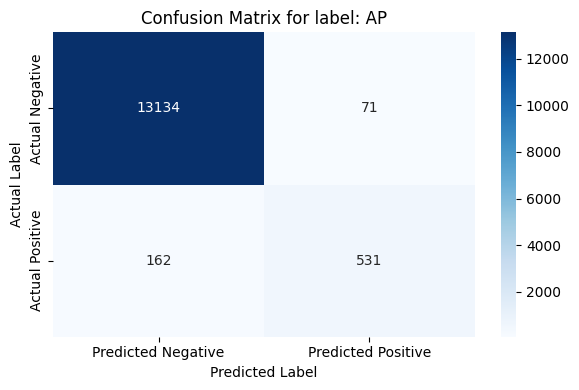

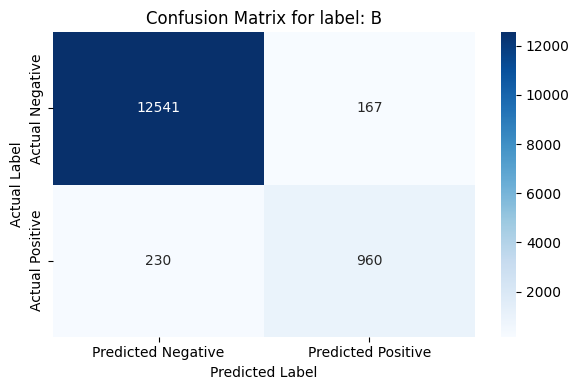

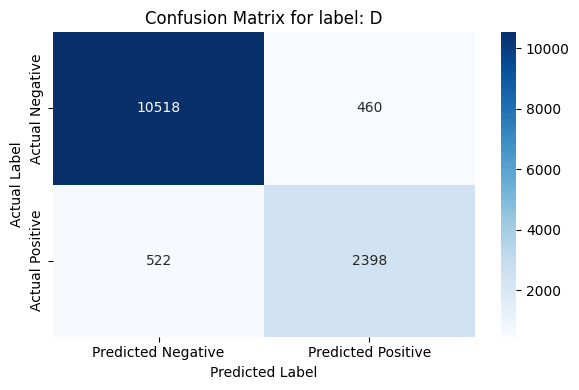

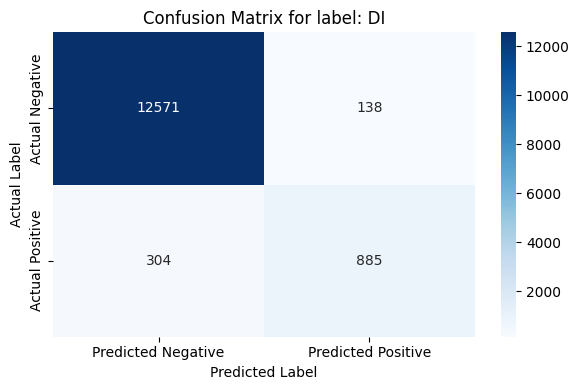

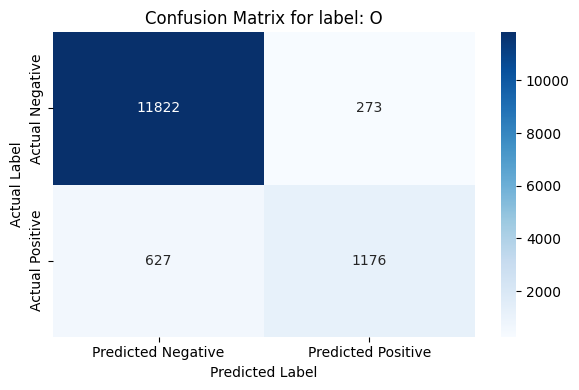

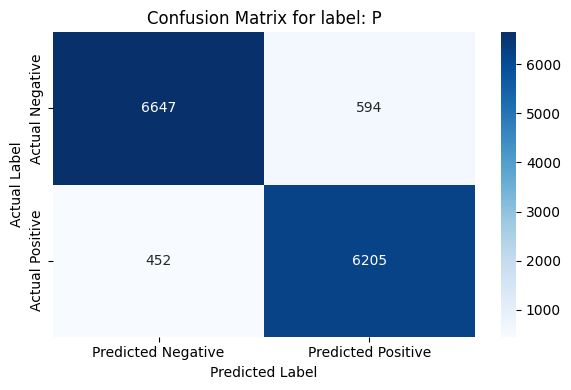

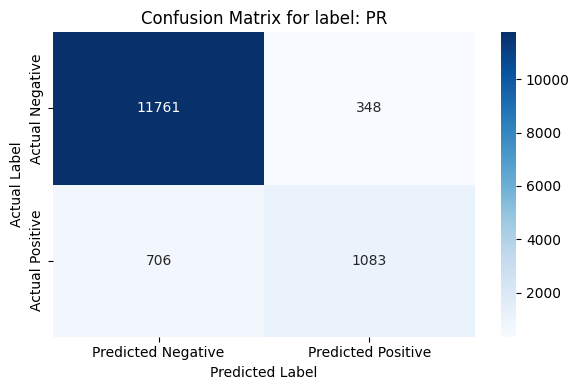

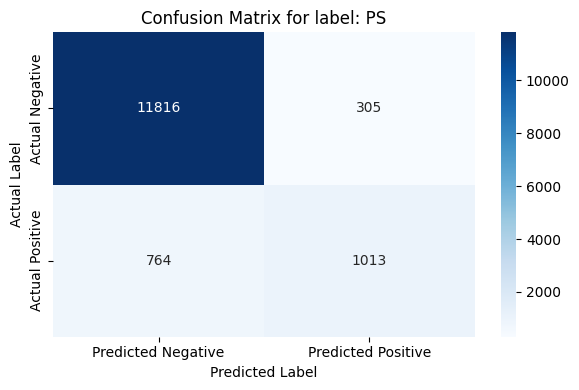

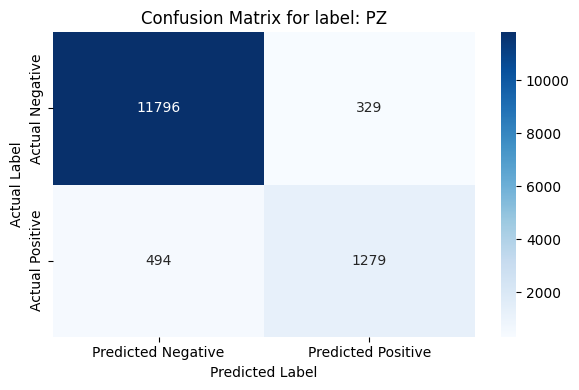

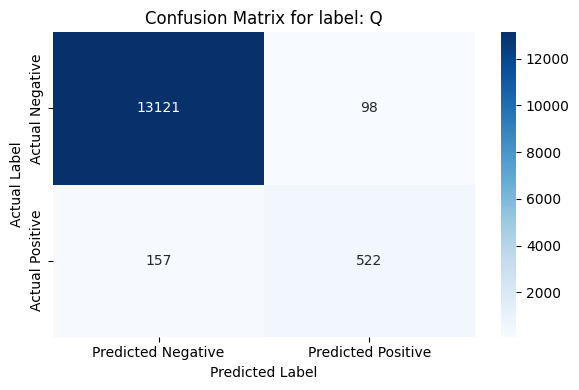

2 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 3000}


100%|██████████| 13898/13898 [00:02<00:00, 6315.40it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.88      0.77      0.82       693
           B       0.85      0.81      0.83      1190
           D       0.84      0.82      0.83      2920
          DI       0.87      0.75      0.80      1189
           O       0.81      0.65      0.72      1803
           P       0.91      0.93      0.92      6657
          PR       0.76      0.61      0.67      1789
          PS       0.77      0.58      0.66      1777
          PZ       0.79      0.72      0.76      1773
           Q       0.84      0.77      0.80       679

   micro avg       0.85      0.79      0.82     20470
   macro avg       0.83      0.74      0.78     20470
weighted avg       0.85      0.79      0.81     20470
 samples avg       0.81      0.78      0.79     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


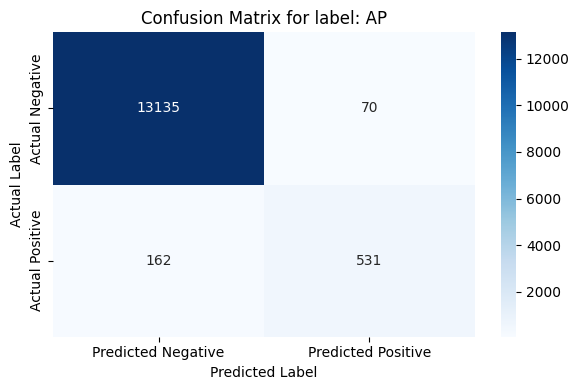

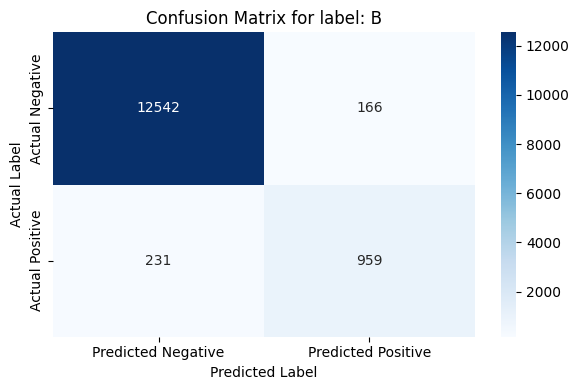

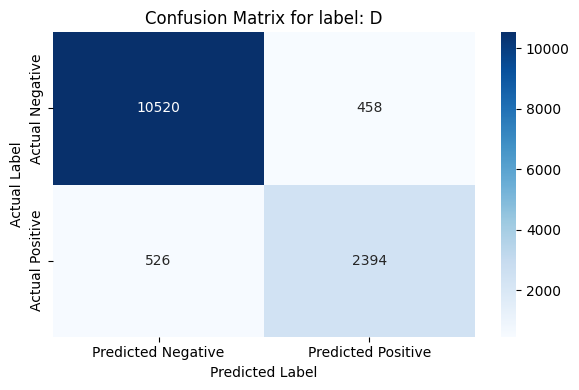

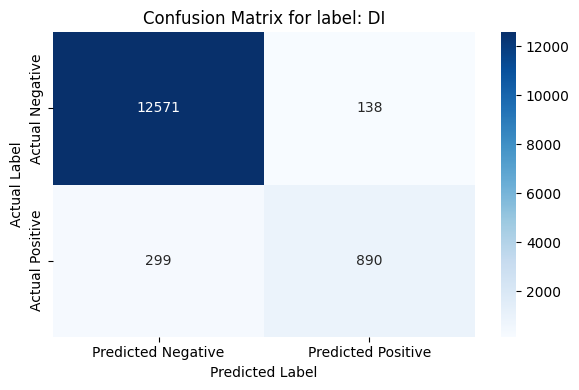

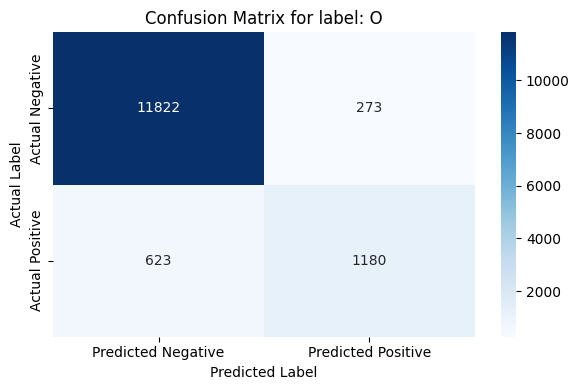

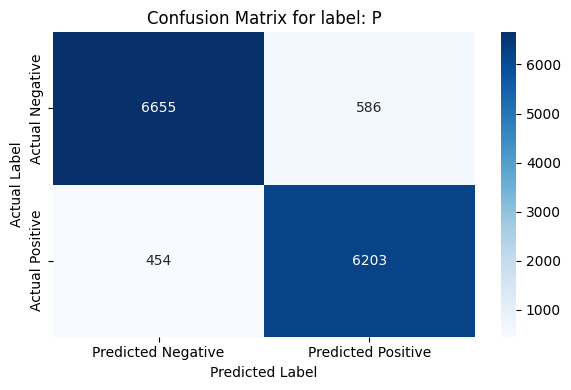

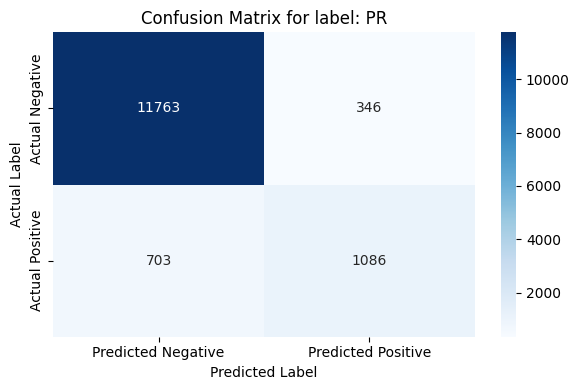

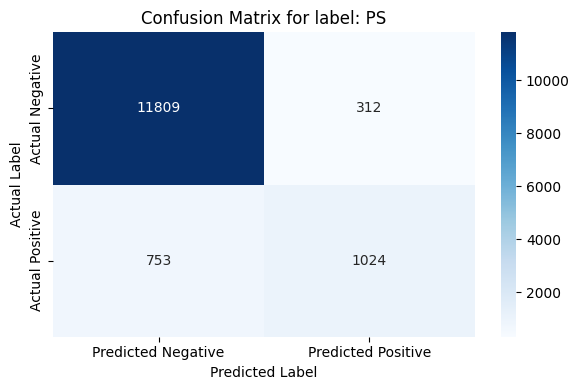

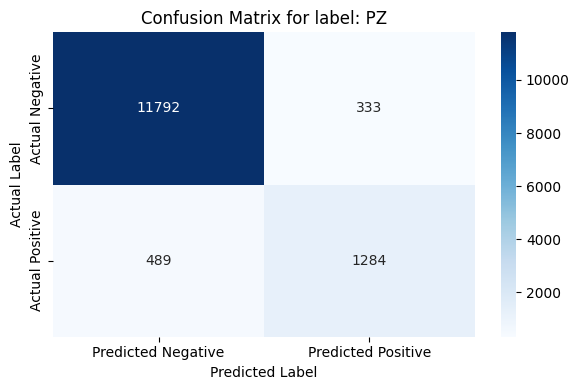

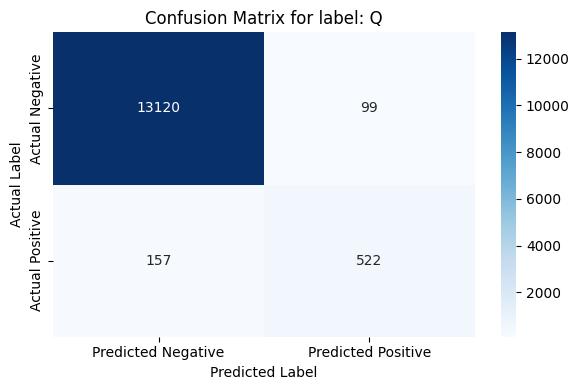

3 {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 1000}


100%|██████████| 13898/13898 [00:02<00:00, 6425.93it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.89      0.74      0.81       693
           B       0.86      0.80      0.83      1190
           D       0.84      0.82      0.83      2920
          DI       0.87      0.74      0.80      1189
           O       0.81      0.65      0.72      1803
           P       0.91      0.93      0.92      6657
          PR       0.77      0.59      0.66      1789
          PS       0.78      0.54      0.64      1777
          PZ       0.80      0.71      0.75      1773
           Q       0.85      0.76      0.80       679

   micro avg       0.86      0.78      0.81     20470
   macro avg       0.84      0.73      0.78     20470
weighted avg       0.85      0.78      0.81     20470
 samples avg       0.81      0.78      0.78     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


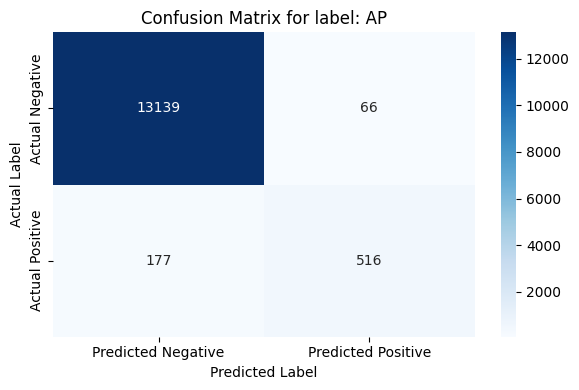

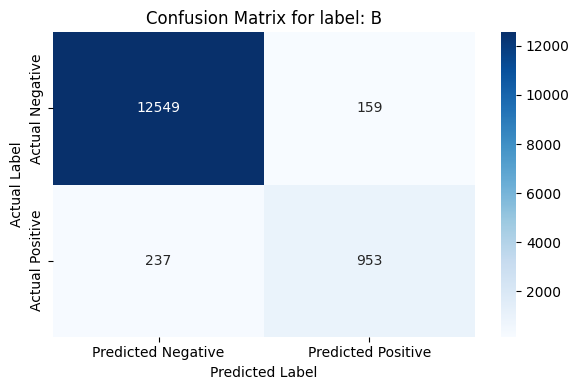

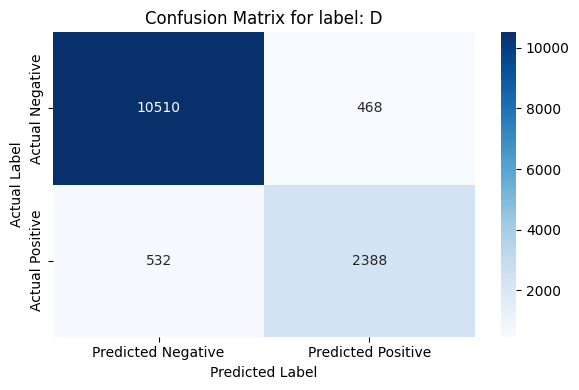

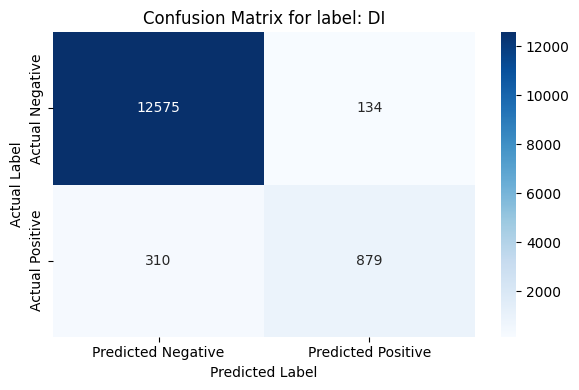

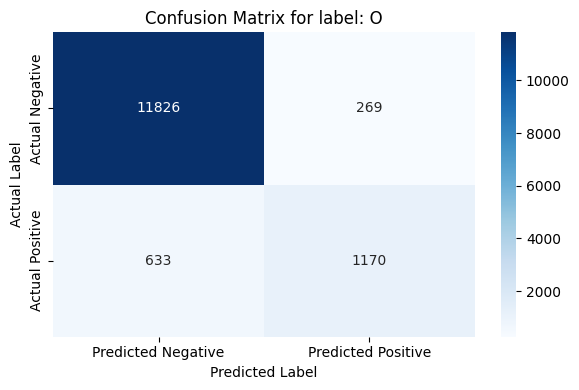

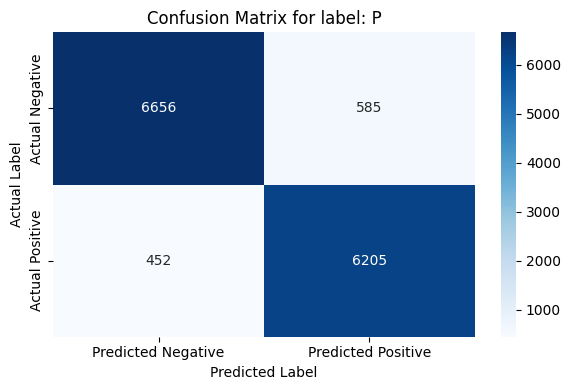

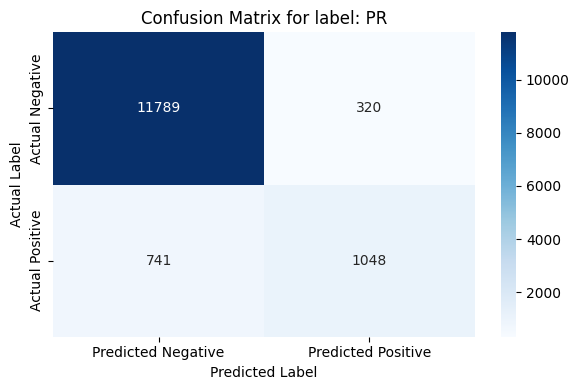

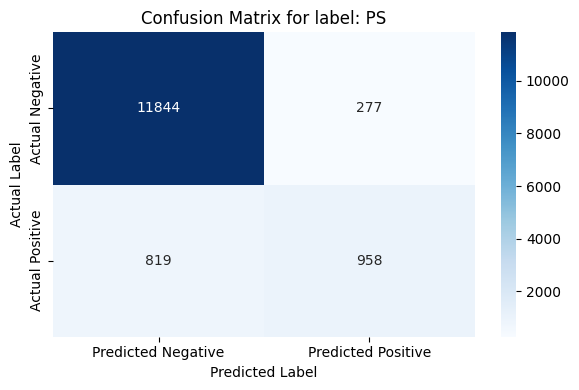

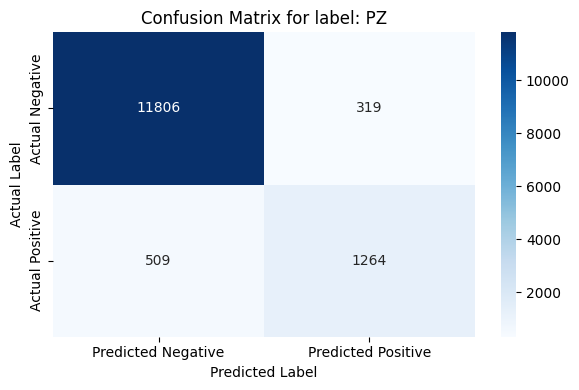

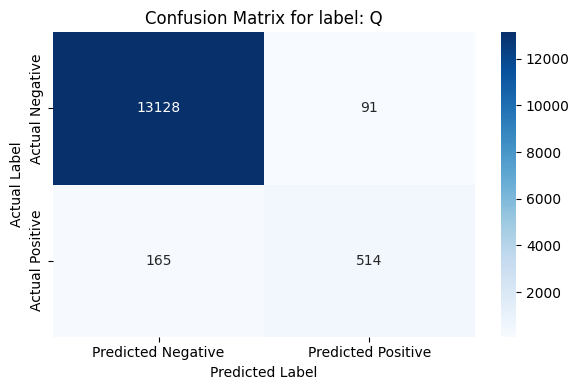

4 {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 2000}


100%|██████████| 13898/13898 [00:02<00:00, 6570.82it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.89      0.75      0.81       693
           B       0.86      0.80      0.83      1190
           D       0.84      0.82      0.83      2920
          DI       0.87      0.74      0.80      1189
           O       0.81      0.65      0.72      1803
           P       0.91      0.93      0.92      6657
          PR       0.76      0.59      0.66      1789
          PS       0.77      0.54      0.64      1777
          PZ       0.80      0.72      0.75      1773
           Q       0.85      0.76      0.80       679

   micro avg       0.85      0.78      0.81     20470
   macro avg       0.84      0.73      0.78     20470
weighted avg       0.85      0.78      0.81     20470
 samples avg       0.81      0.78      0.78     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


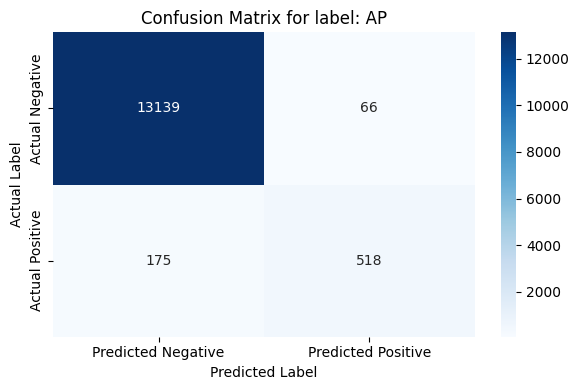

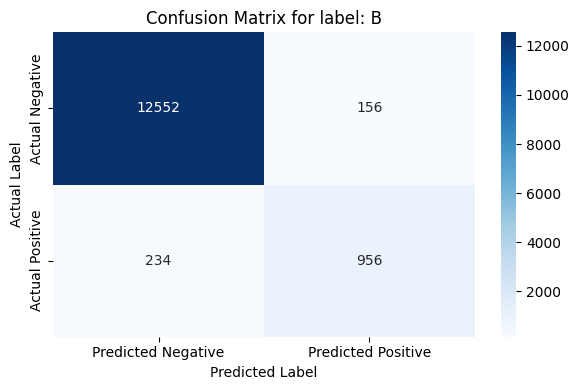

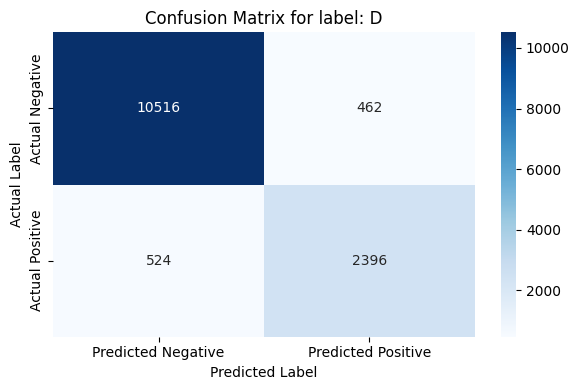

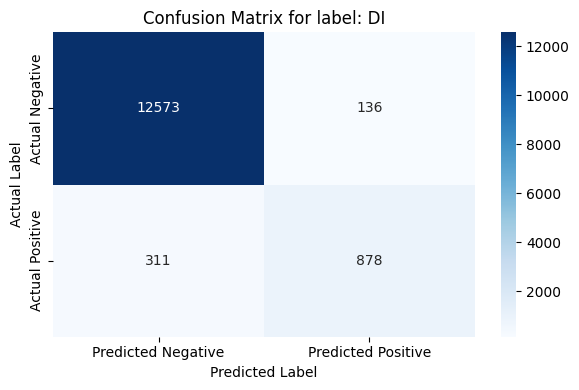

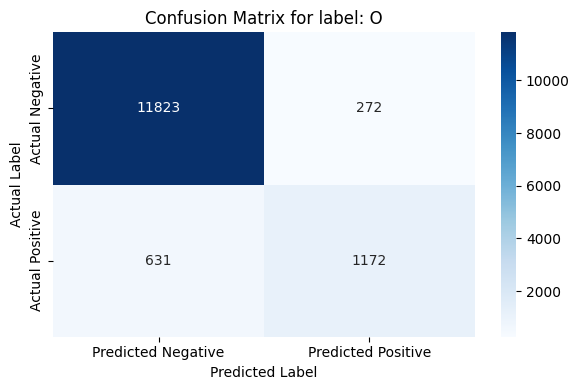

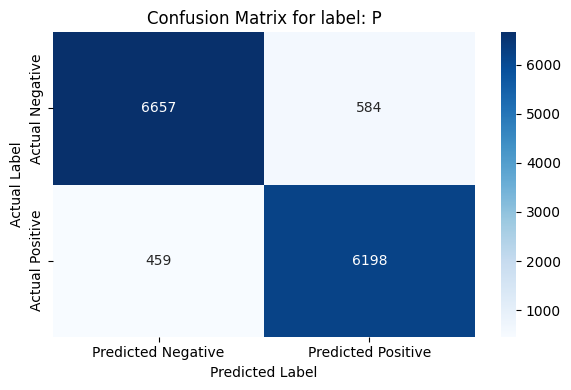

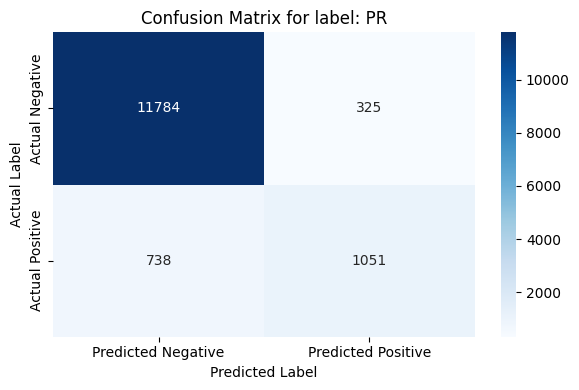

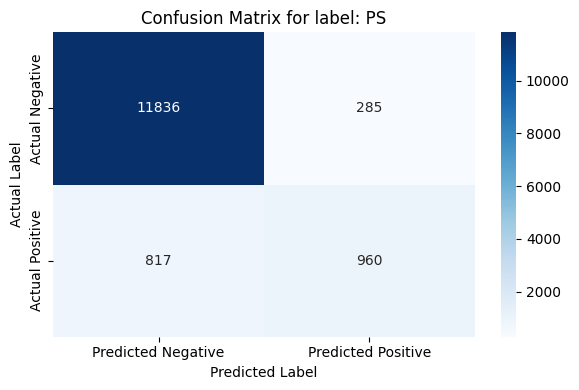

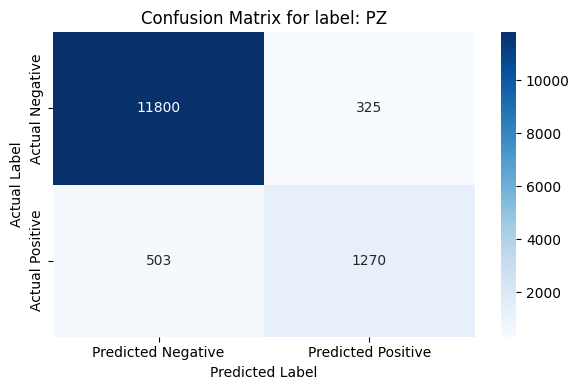

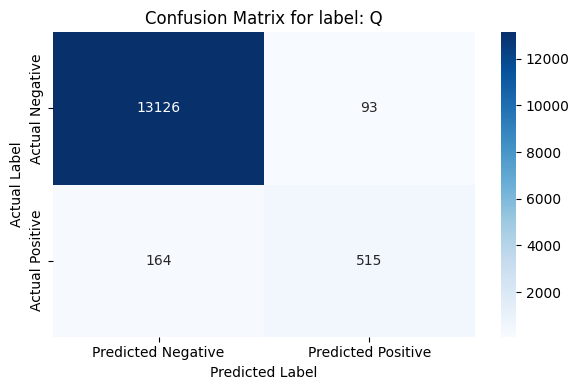

5 {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 3000}


100%|██████████| 13898/13898 [00:02<00:00, 6469.39it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.89      0.75      0.81       693
           B       0.86      0.81      0.83      1190
           D       0.84      0.82      0.83      2920
          DI       0.87      0.74      0.80      1189
           O       0.81      0.65      0.72      1803
           P       0.91      0.93      0.92      6657
          PR       0.77      0.59      0.67      1789
          PS       0.77      0.54      0.64      1777
          PZ       0.80      0.72      0.75      1773
           Q       0.85      0.76      0.80       679

   micro avg       0.86      0.78      0.81     20470
   macro avg       0.84      0.73      0.78     20470
weighted avg       0.85      0.78      0.81     20470
 samples avg       0.81      0.78      0.78     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


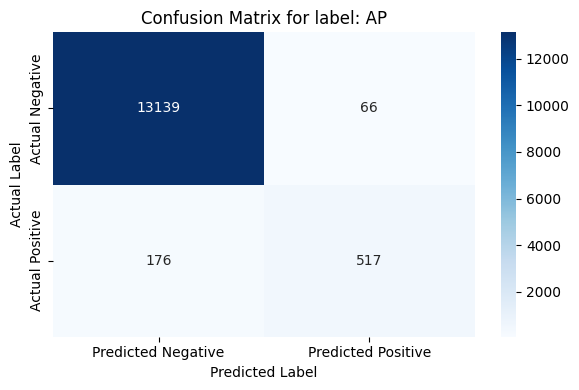

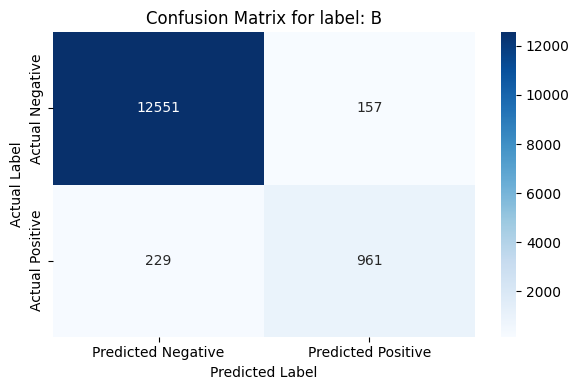

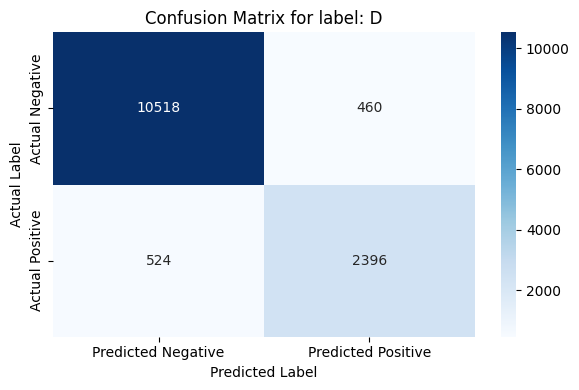

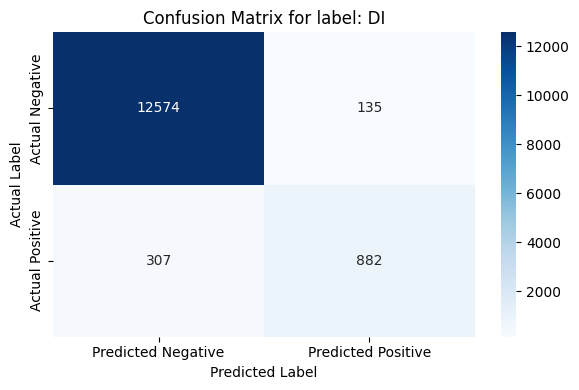

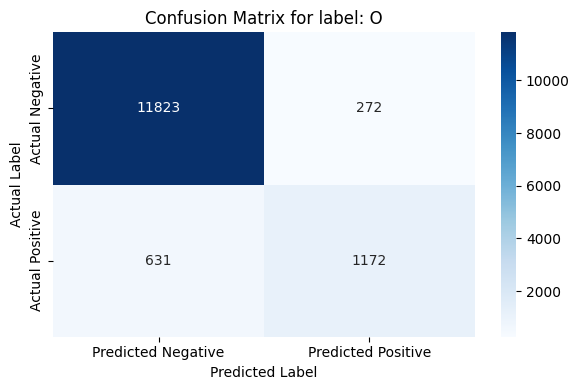

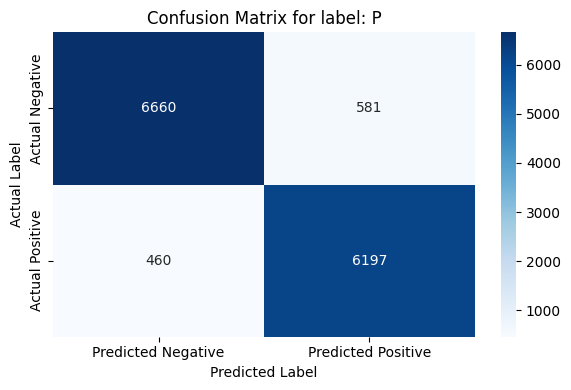

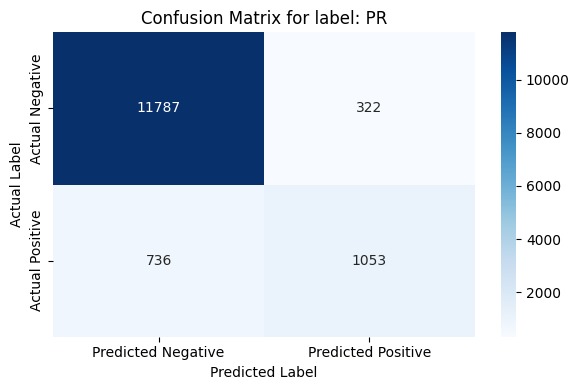

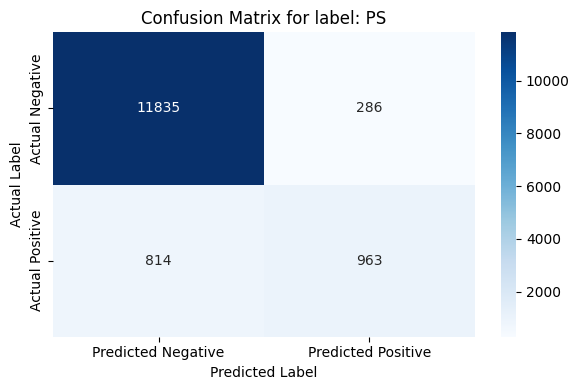

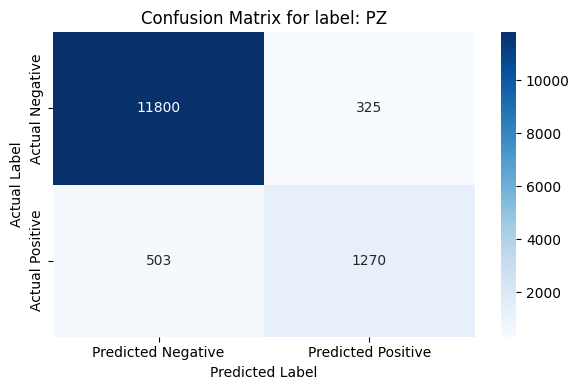

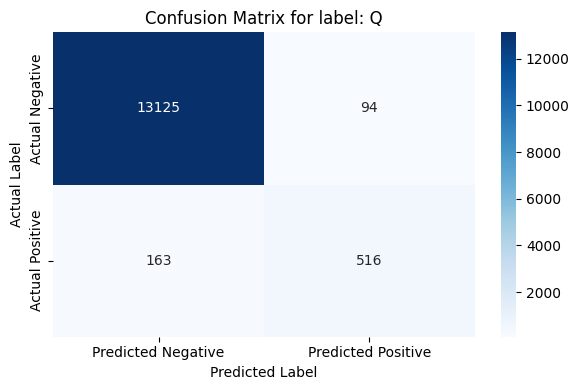

6 {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 1000}


100%|██████████| 13898/13898 [00:02<00:00, 6463.99it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.88      0.76      0.82       693
           B       0.86      0.81      0.83      1190
           D       0.83      0.83      0.83      2920
          DI       0.86      0.75      0.80      1189
           O       0.82      0.65      0.72      1803
           P       0.91      0.93      0.92      6657
          PR       0.75      0.59      0.66      1789
          PS       0.77      0.58      0.66      1777
          PZ       0.80      0.72      0.76      1773
           Q       0.84      0.76      0.80       679

   micro avg       0.85      0.78      0.82     20470
   macro avg       0.83      0.74      0.78     20470
weighted avg       0.85      0.78      0.81     20470
 samples avg       0.81      0.78      0.79     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


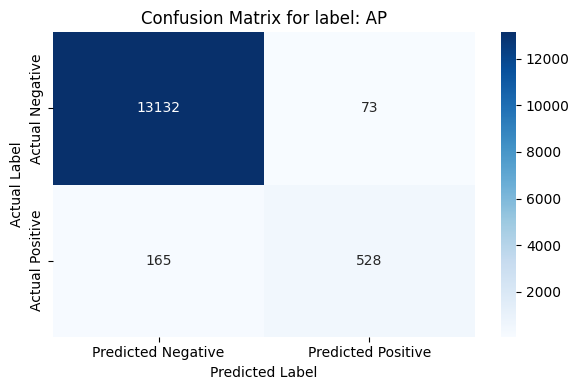

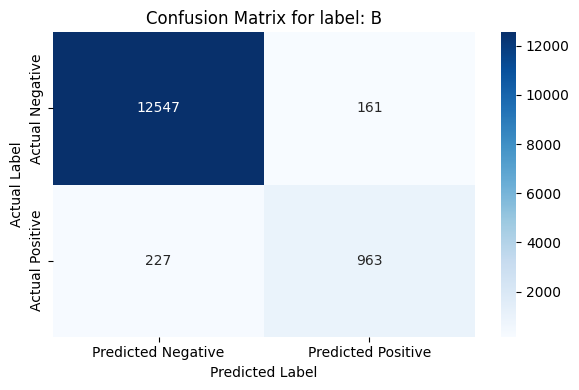

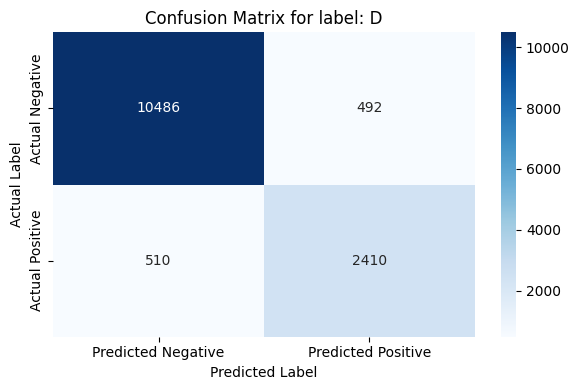

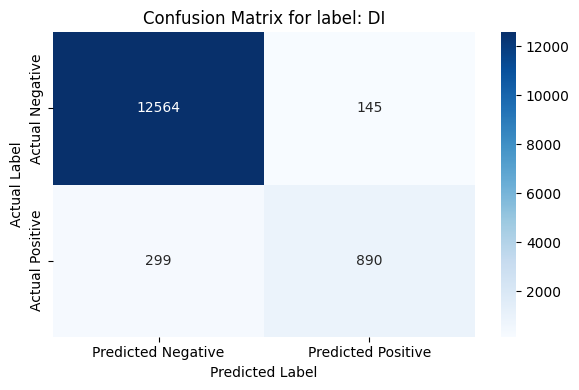

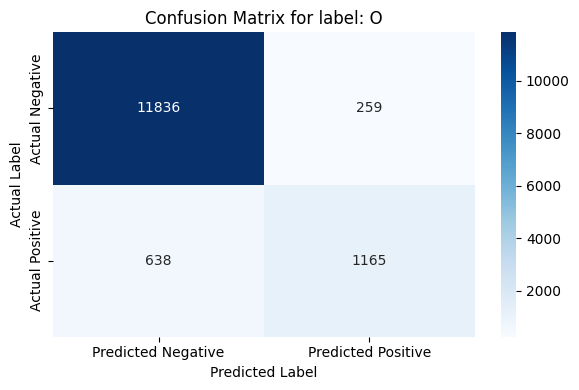

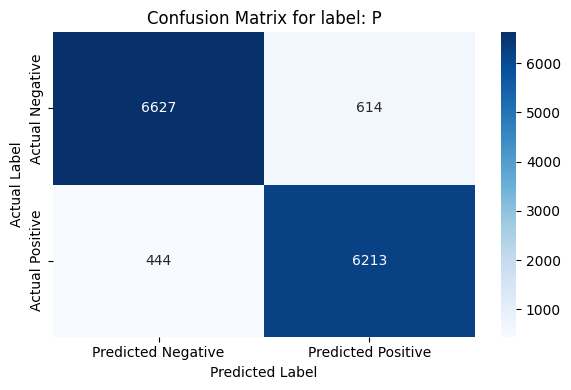

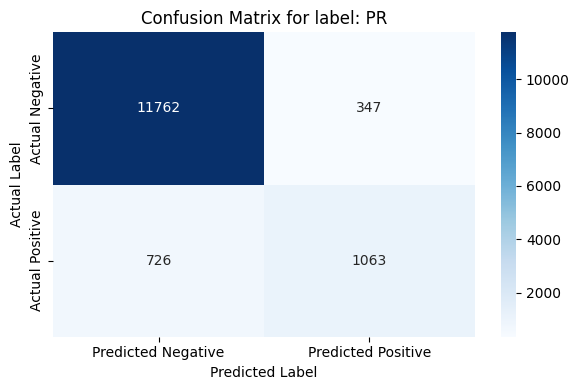

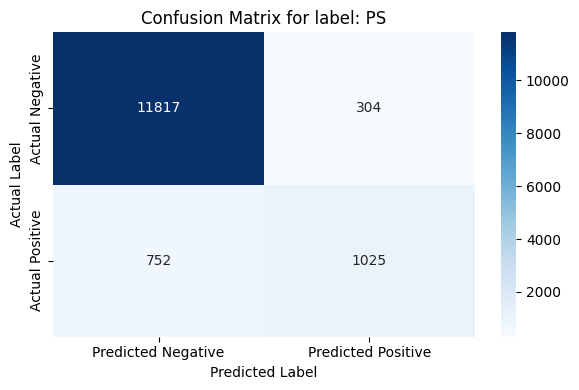

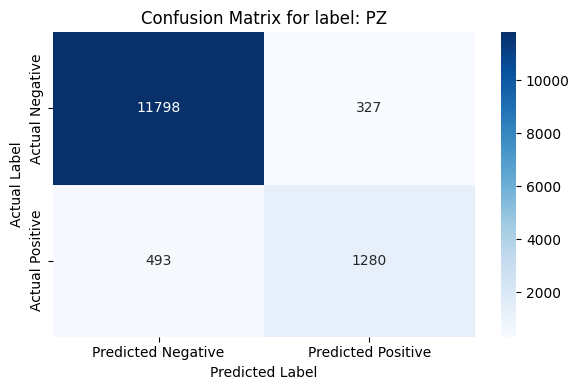

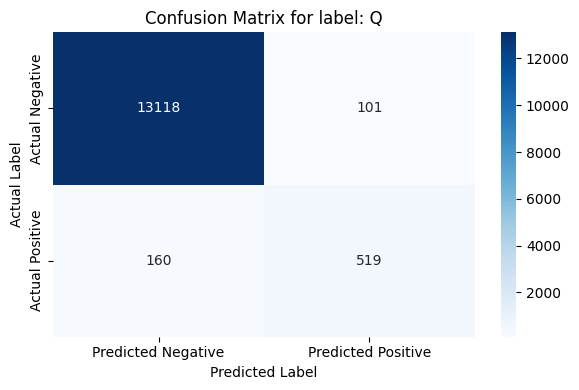

7 {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 2000}


100%|██████████| 13898/13898 [00:02<00:00, 6446.83it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.88      0.76      0.82       693
           B       0.86      0.81      0.83      1190
           D       0.83      0.83      0.83      2920
          DI       0.86      0.75      0.80      1189
           O       0.82      0.65      0.73      1803
           P       0.91      0.93      0.92      6657
          PR       0.76      0.60      0.67      1789
          PS       0.77      0.58      0.66      1777
          PZ       0.80      0.73      0.76      1773
           Q       0.84      0.77      0.80       679

   micro avg       0.85      0.79      0.82     20470
   macro avg       0.83      0.74      0.78     20470
weighted avg       0.85      0.79      0.81     20470
 samples avg       0.81      0.78      0.79     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


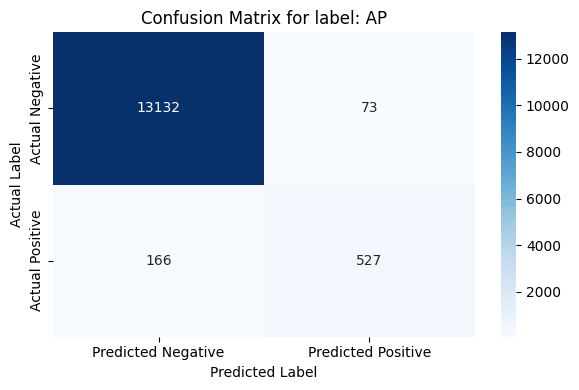

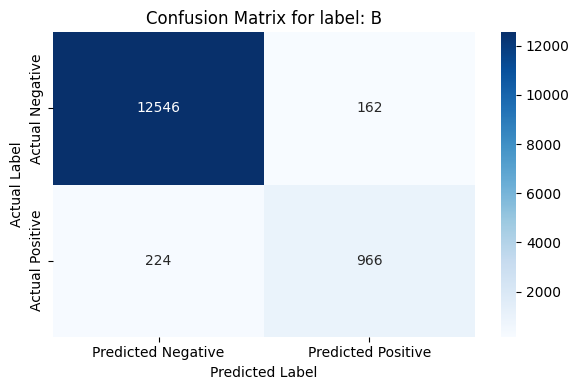

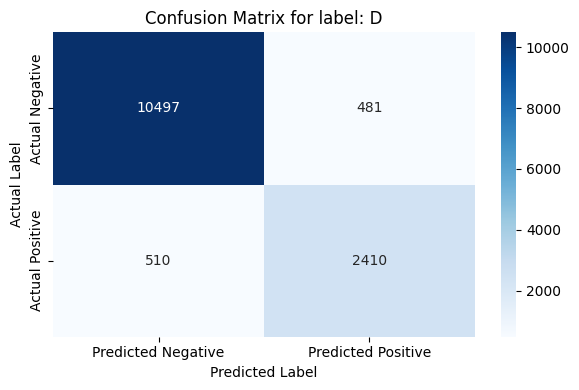

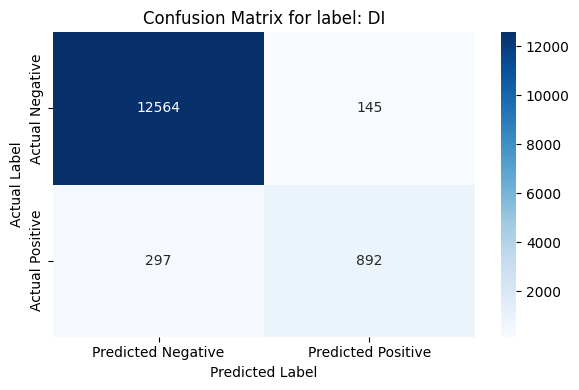

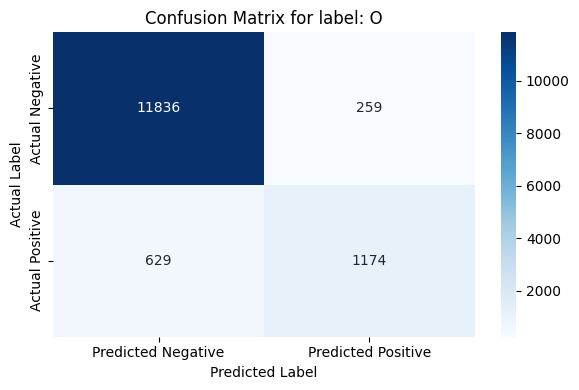

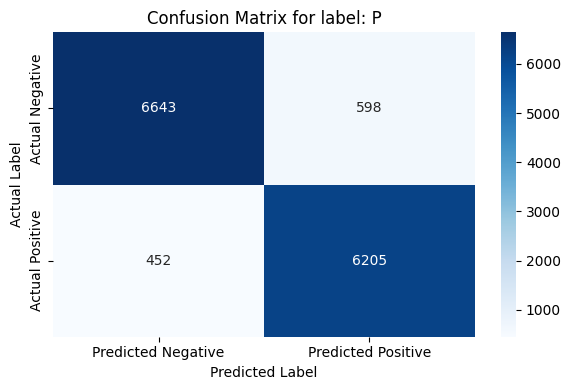

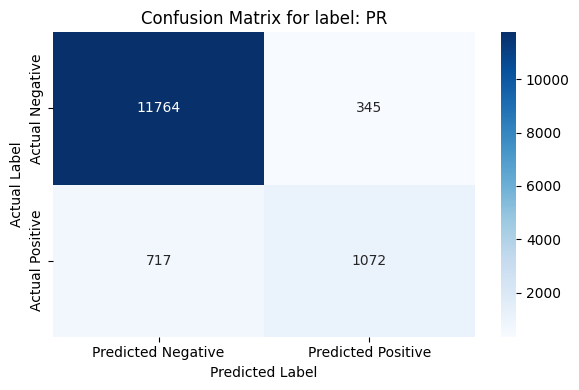

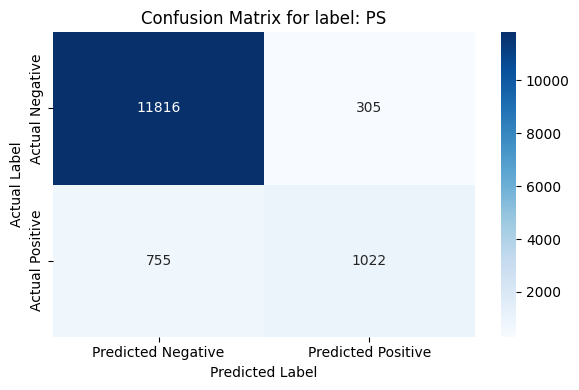

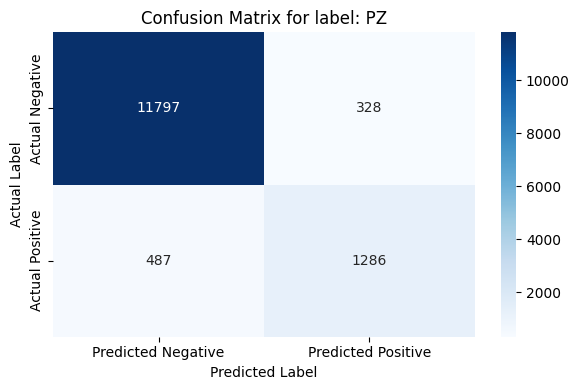

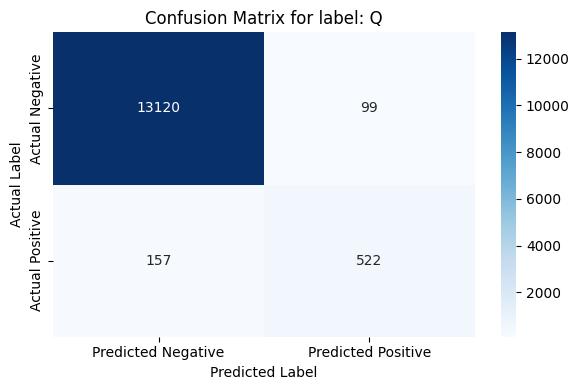

8 {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 3000}


100%|██████████| 13898/13898 [00:02<00:00, 6443.12it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.88      0.76      0.82       693
           B       0.86      0.81      0.83      1190
           D       0.83      0.82      0.83      2920
          DI       0.86      0.75      0.80      1189
           O       0.82      0.65      0.73      1803
           P       0.91      0.93      0.92      6657
          PR       0.76      0.60      0.67      1789
          PS       0.77      0.57      0.66      1777
          PZ       0.80      0.73      0.76      1773
           Q       0.84      0.77      0.80       679

   micro avg       0.85      0.79      0.82     20470
   macro avg       0.83      0.74      0.78     20470
weighted avg       0.85      0.79      0.81     20470
 samples avg       0.81      0.78      0.79     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


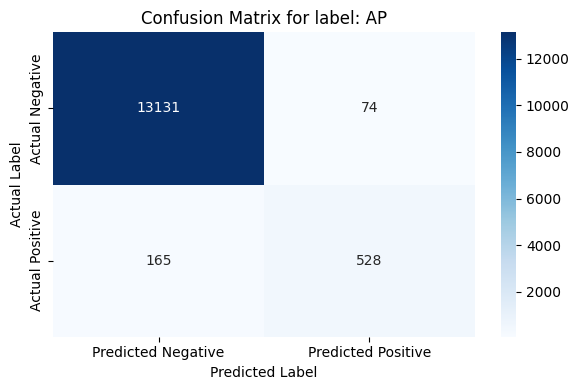

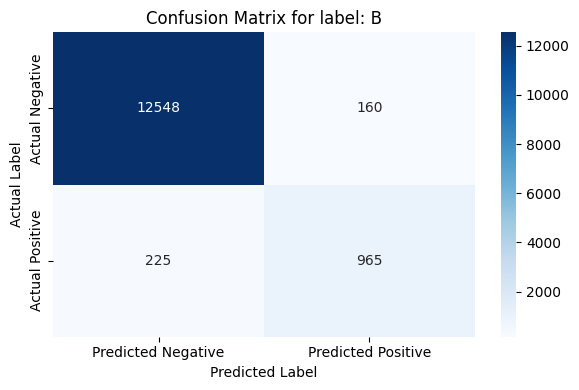

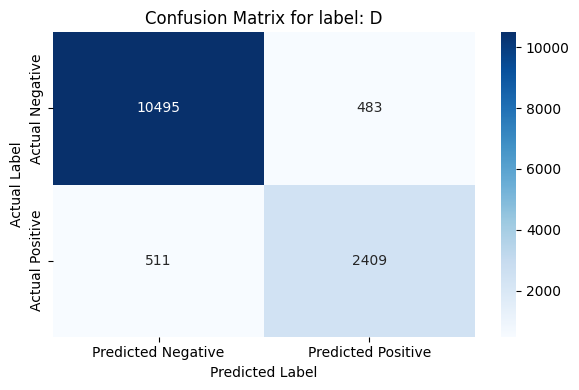

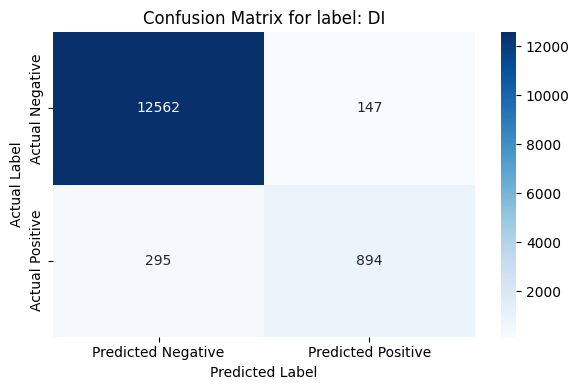

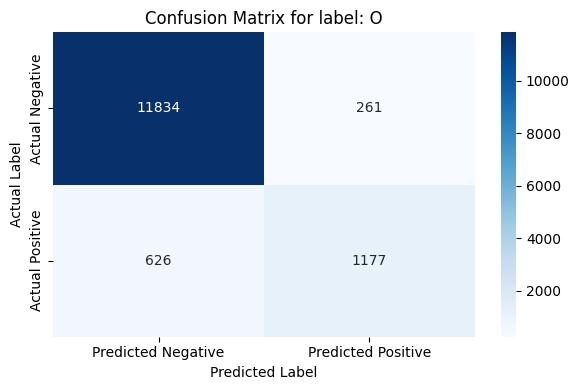

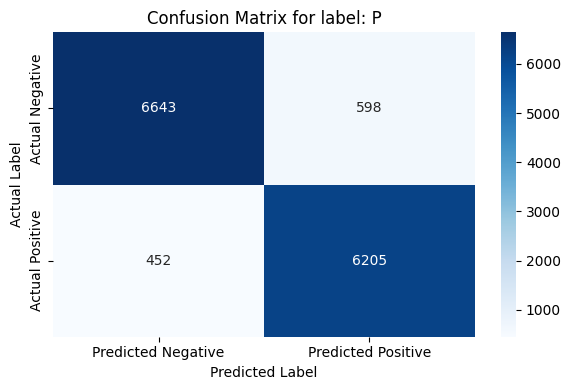

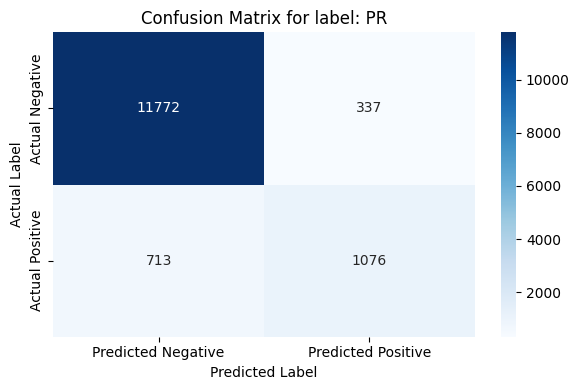

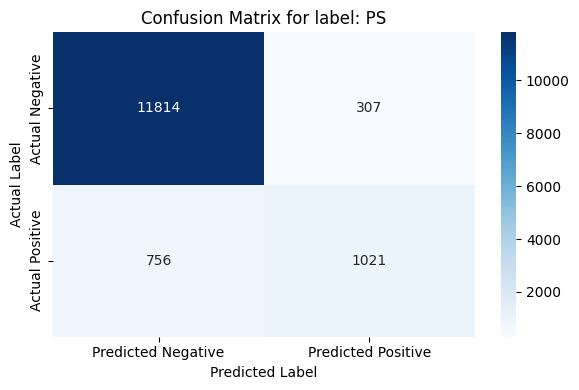

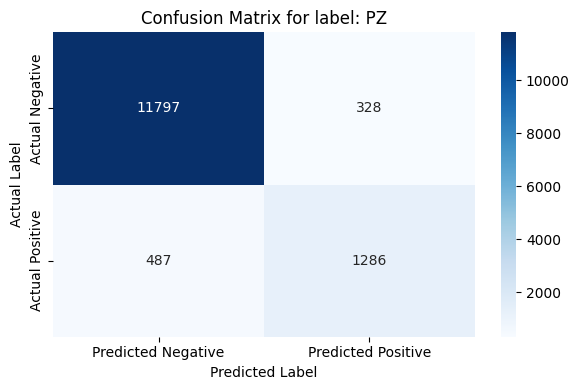

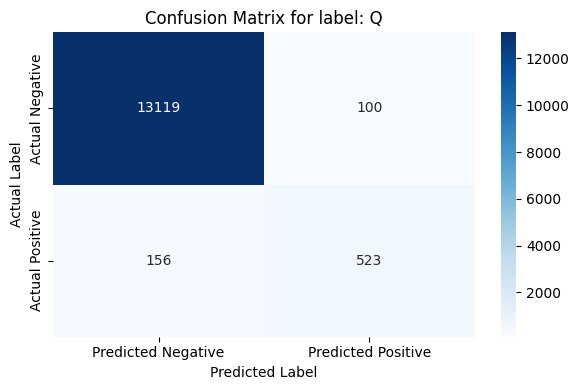

9 {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 1000}


100%|██████████| 13898/13898 [00:02<00:00, 6234.94it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.89      0.74      0.80       693
           B       0.86      0.80      0.83      1190
           D       0.83      0.82      0.83      2920
          DI       0.87      0.73      0.79      1189
           O       0.81      0.64      0.72      1803
           P       0.91      0.93      0.92      6657
          PR       0.76      0.57      0.65      1789
          PS       0.77      0.54      0.64      1777
          PZ       0.79      0.71      0.75      1773
           Q       0.84      0.76      0.80       679

   micro avg       0.85      0.77      0.81     20470
   macro avg       0.83      0.73      0.77     20470
weighted avg       0.85      0.77      0.81     20470
 samples avg       0.81      0.77      0.78     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


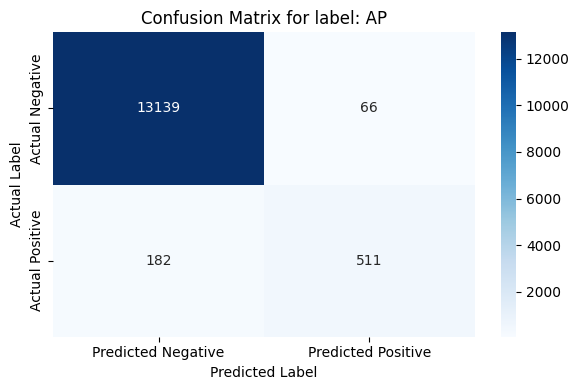

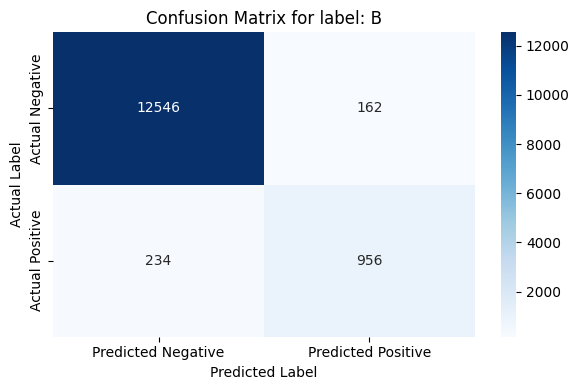

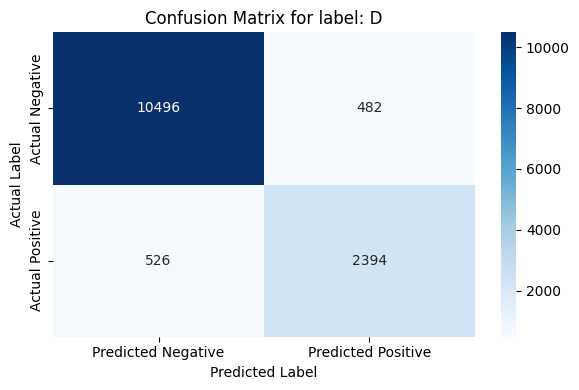

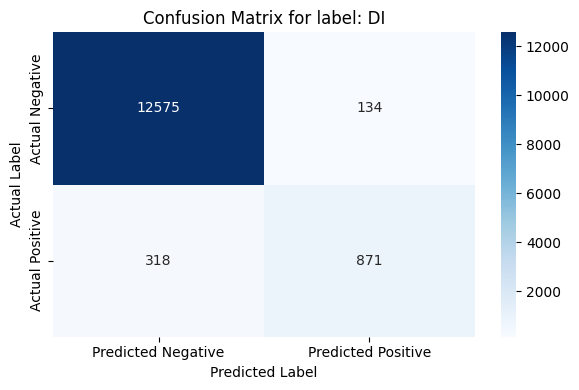

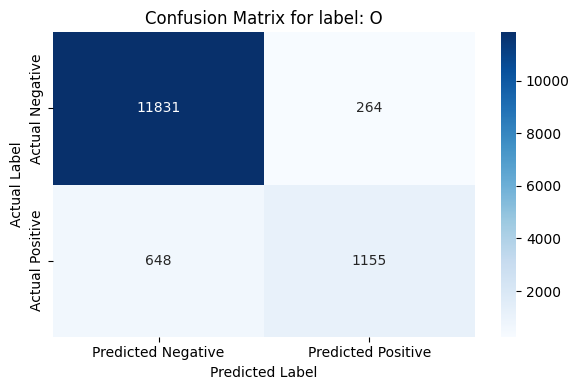

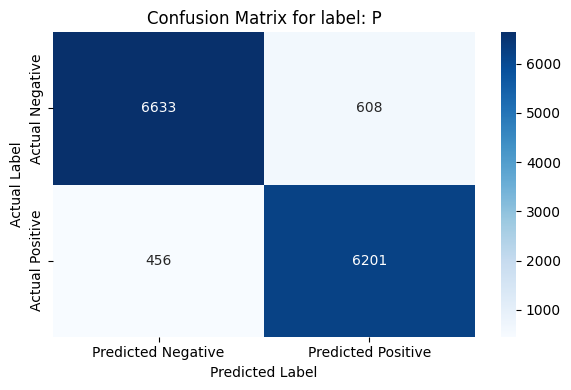

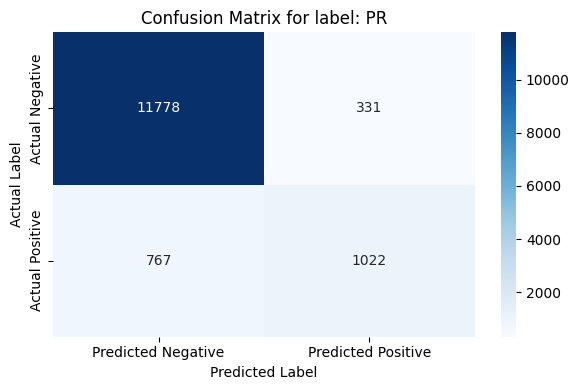

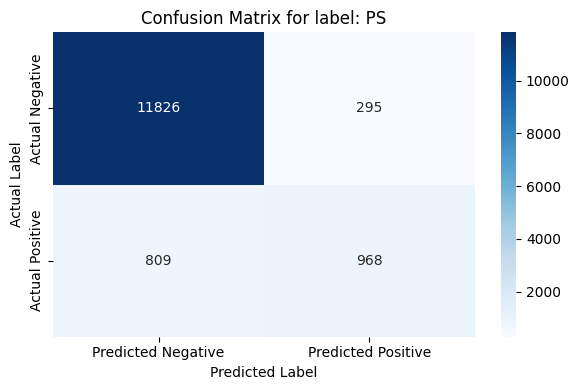

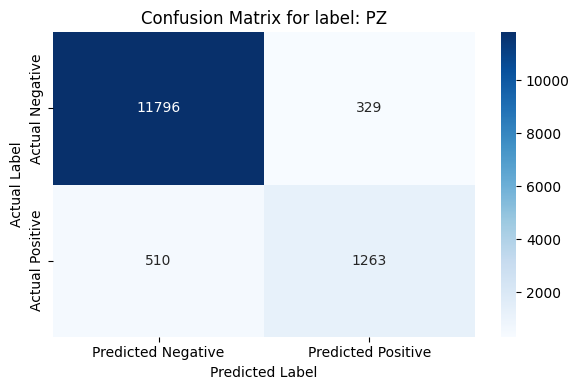

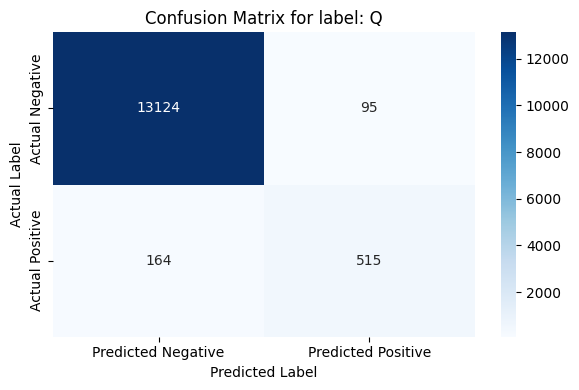

10 {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 2000}


100%|██████████| 13898/13898 [00:02<00:00, 6429.86it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.89      0.74      0.81       693
           B       0.86      0.81      0.83      1190
           D       0.84      0.82      0.83      2920
          DI       0.87      0.74      0.80      1189
           O       0.82      0.64      0.72      1803
           P       0.91      0.93      0.92      6657
          PR       0.76      0.57      0.65      1789
          PS       0.77      0.55      0.64      1777
          PZ       0.80      0.71      0.75      1773
           Q       0.85      0.76      0.80       679

   micro avg       0.85      0.78      0.81     20470
   macro avg       0.83      0.73      0.78     20470
weighted avg       0.85      0.78      0.81     20470
 samples avg       0.81      0.78      0.78     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


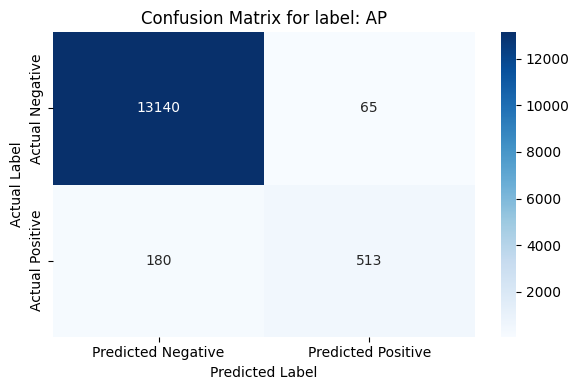

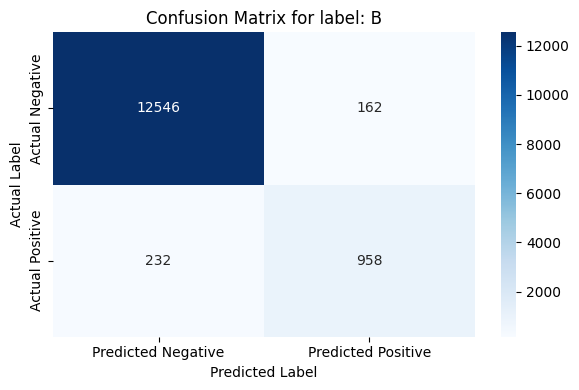

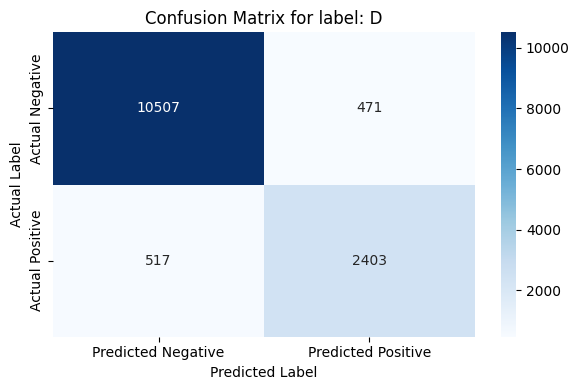

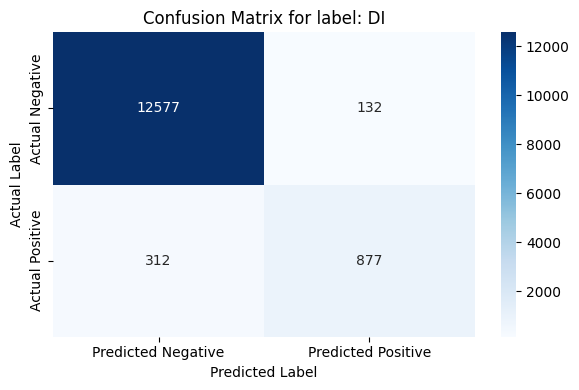

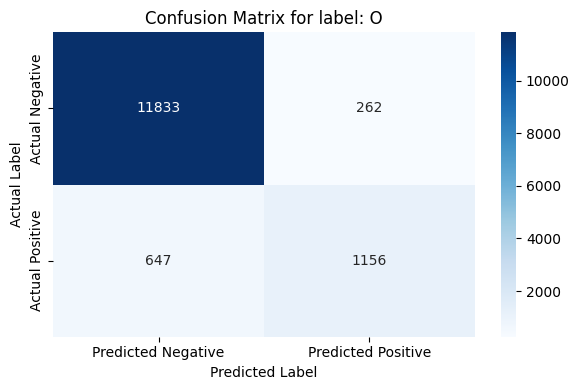

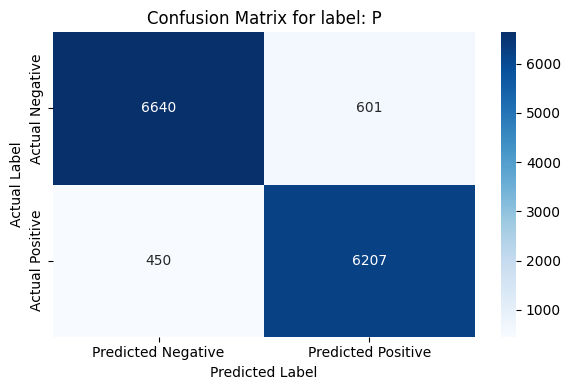

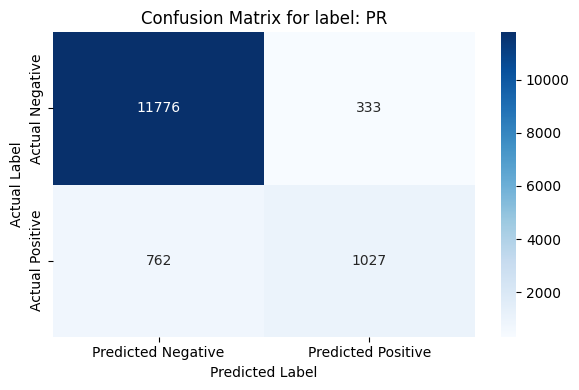

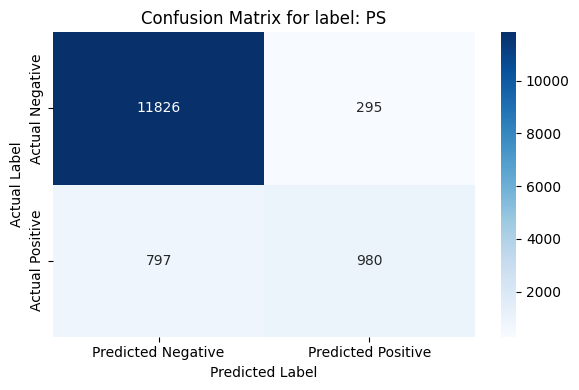

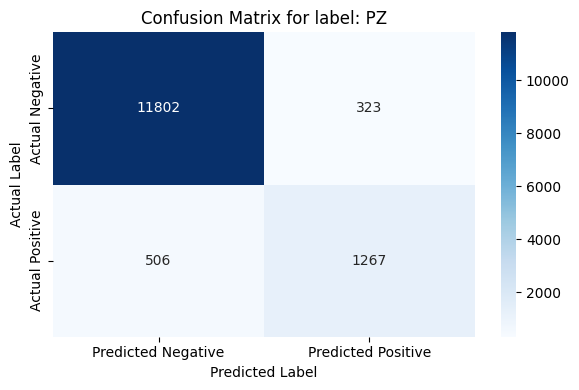

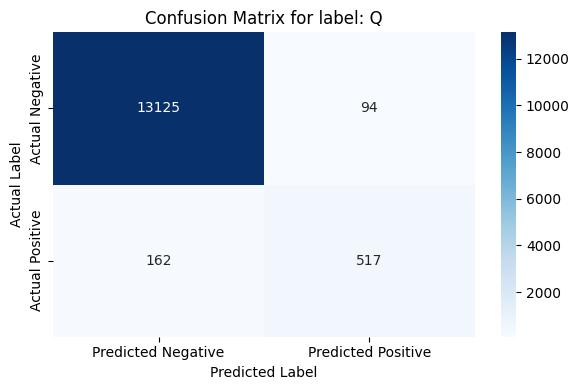

11 {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 3000}


100%|██████████| 13898/13898 [00:02<00:00, 6382.33it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.89      0.74      0.81       693
           B       0.85      0.81      0.83      1190
           D       0.84      0.82      0.83      2920
          DI       0.87      0.74      0.80      1189
           O       0.81      0.64      0.72      1803
           P       0.91      0.93      0.92      6657
          PR       0.76      0.58      0.66      1789
          PS       0.77      0.55      0.64      1777
          PZ       0.79      0.71      0.75      1773
           Q       0.85      0.76      0.80       679

   micro avg       0.85      0.78      0.81     20470
   macro avg       0.83      0.73      0.78     20470
weighted avg       0.85      0.78      0.81     20470
 samples avg       0.81      0.78      0.78     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


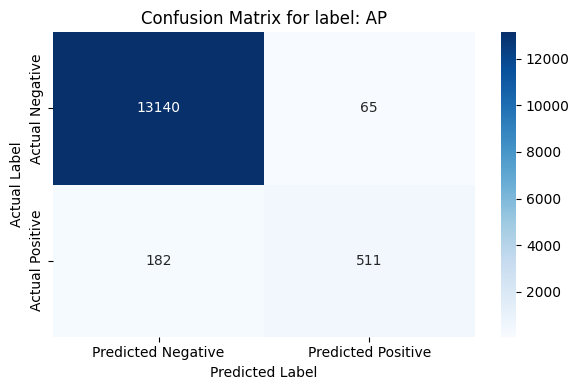

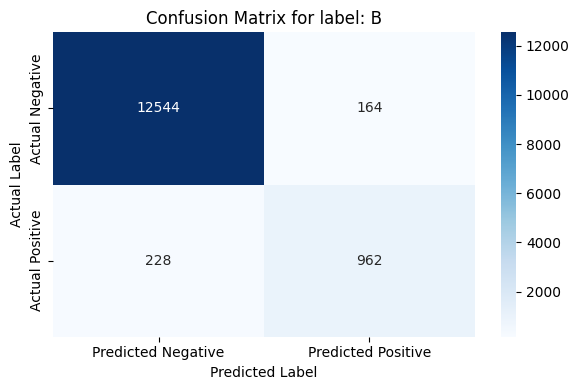

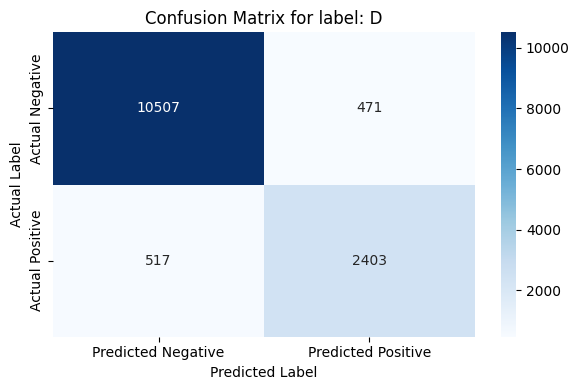

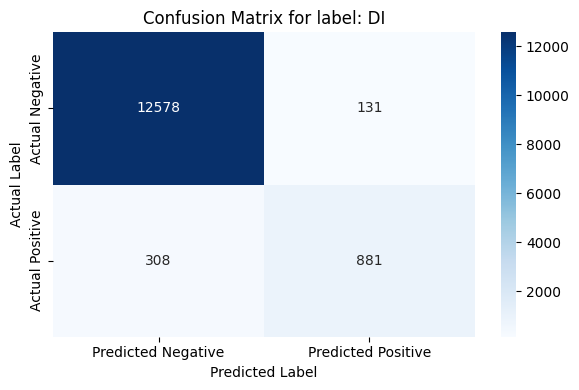

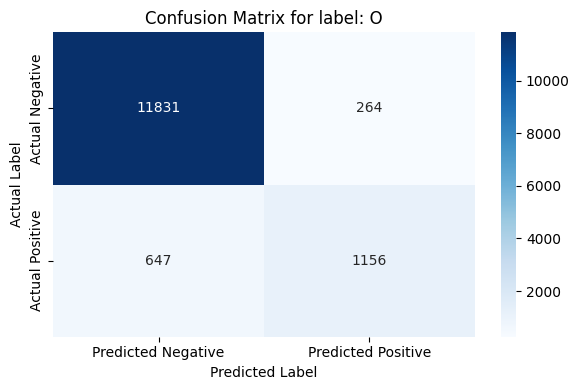

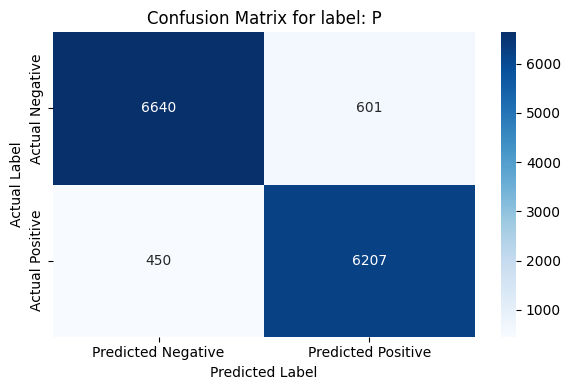

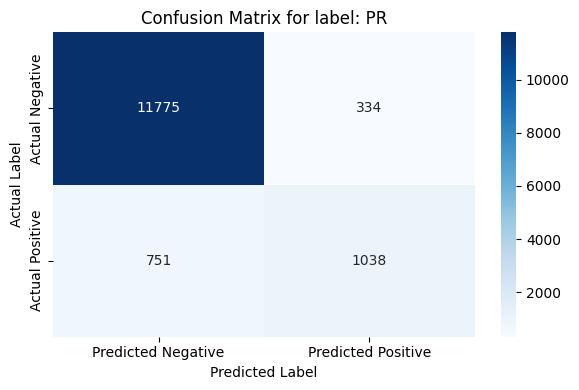

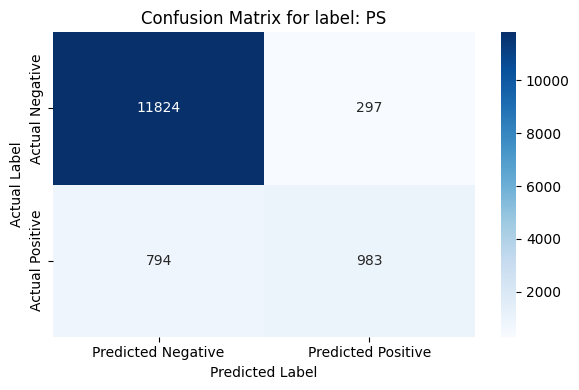

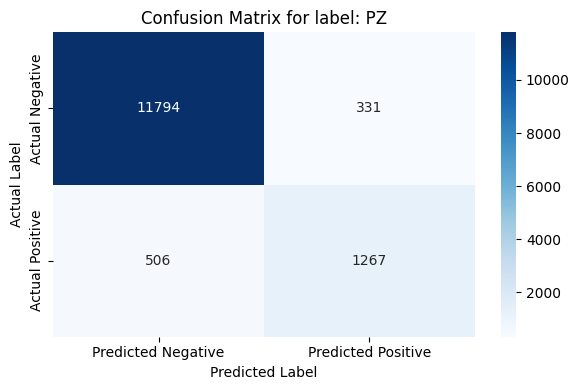

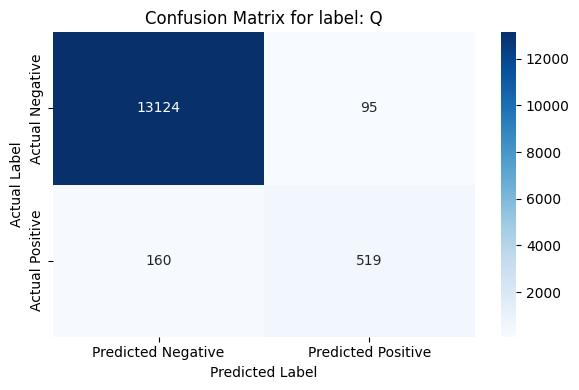

12 {'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 1000}


100%|██████████| 13898/13898 [00:02<00:00, 6137.18it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.87      0.77      0.82       693
           B       0.85      0.81      0.83      1190
           D       0.82      0.83      0.83      2920
          DI       0.86      0.74      0.80      1189
           O       0.80      0.65      0.72      1803
           P       0.91      0.94      0.92      6657
          PR       0.74      0.60      0.67      1789
          PS       0.76      0.58      0.66      1777
          PZ       0.79      0.72      0.75      1773
           Q       0.84      0.77      0.80       679

   micro avg       0.84      0.79      0.81     20470
   macro avg       0.82      0.74      0.78     20470
weighted avg       0.84      0.79      0.81     20470
 samples avg       0.81      0.79      0.79     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


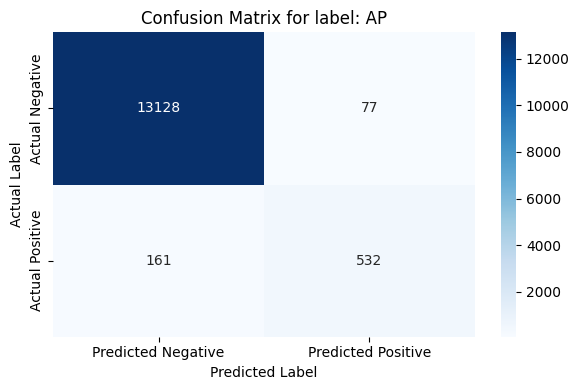

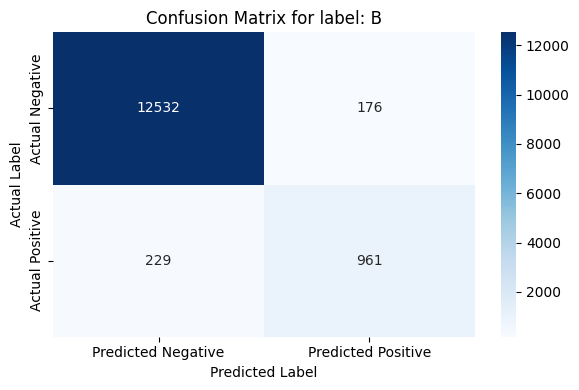

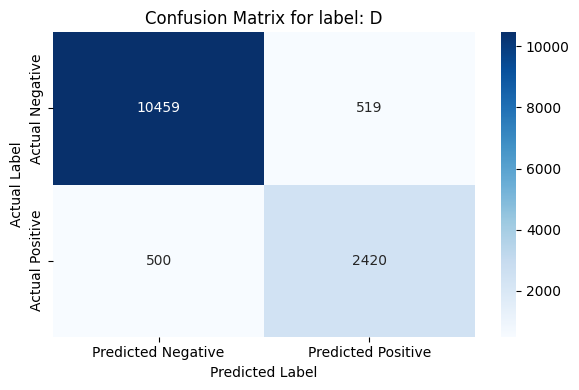

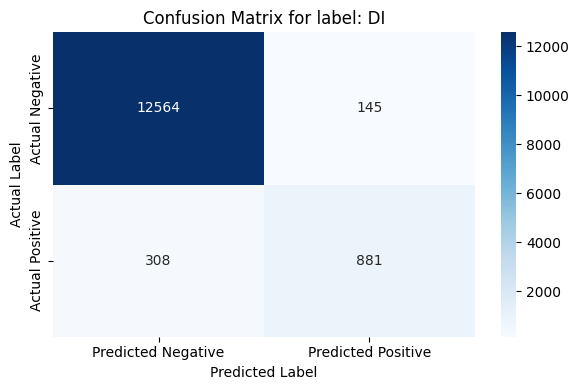

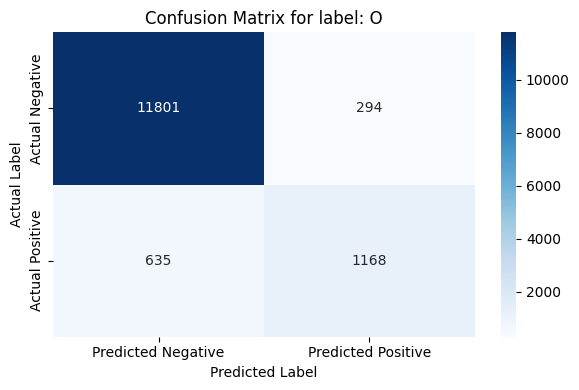

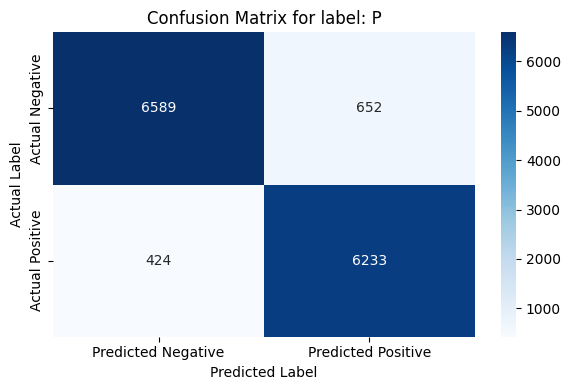

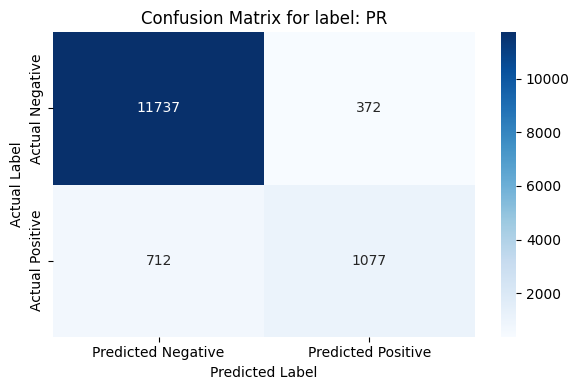

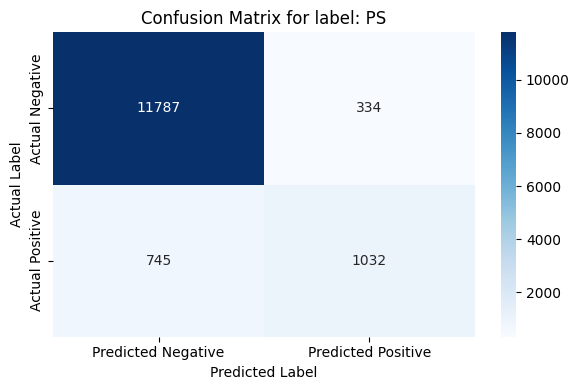

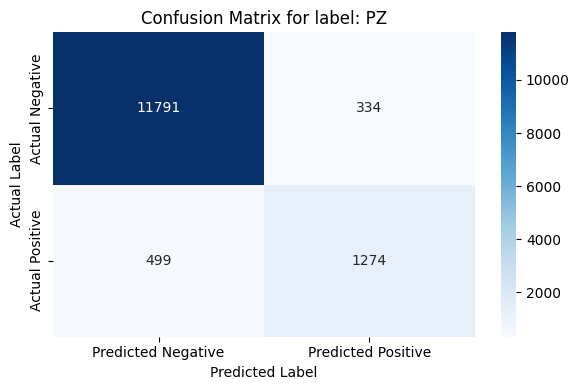

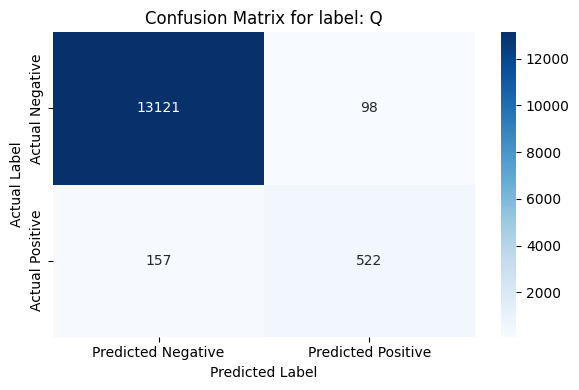

13 {'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 2000}


100%|██████████| 13898/13898 [00:02<00:00, 6485.99it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.87      0.77      0.82       693
           B       0.85      0.81      0.83      1190
           D       0.83      0.83      0.83      2920
          DI       0.86      0.75      0.80      1189
           O       0.80      0.65      0.72      1803
           P       0.91      0.94      0.92      6657
          PR       0.75      0.60      0.67      1789
          PS       0.75      0.58      0.66      1777
          PZ       0.79      0.72      0.75      1773
           Q       0.84      0.77      0.80       679

   micro avg       0.84      0.79      0.81     20470
   macro avg       0.82      0.74      0.78     20470
weighted avg       0.84      0.79      0.81     20470
 samples avg       0.81      0.79      0.79     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


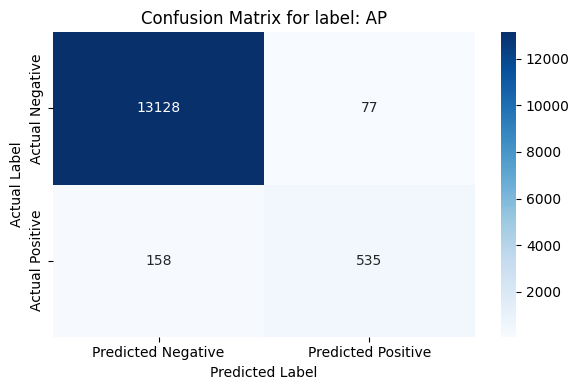

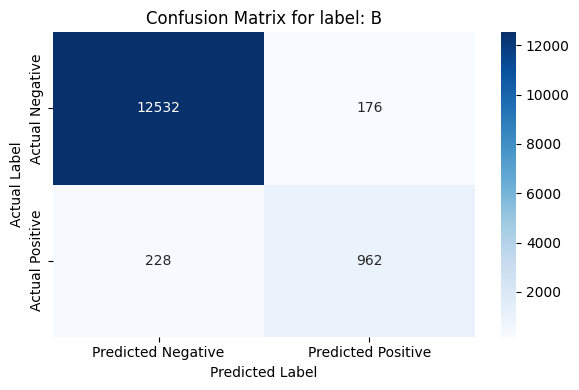

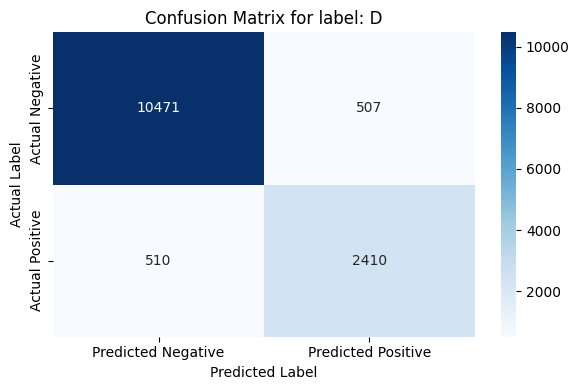

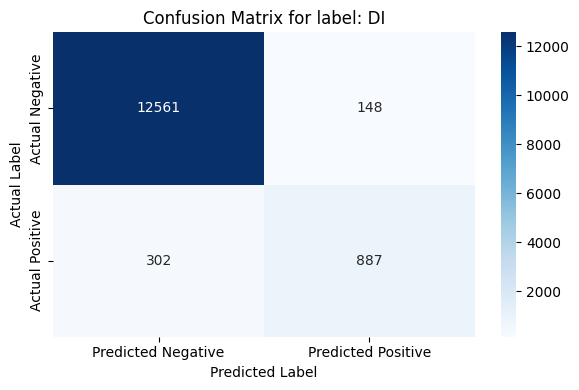

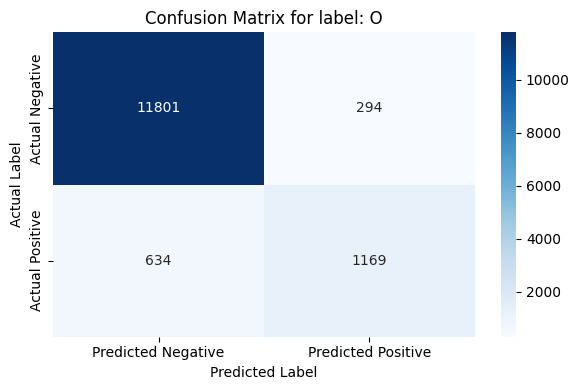

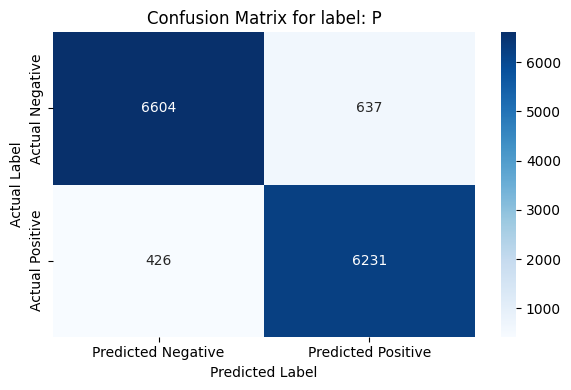

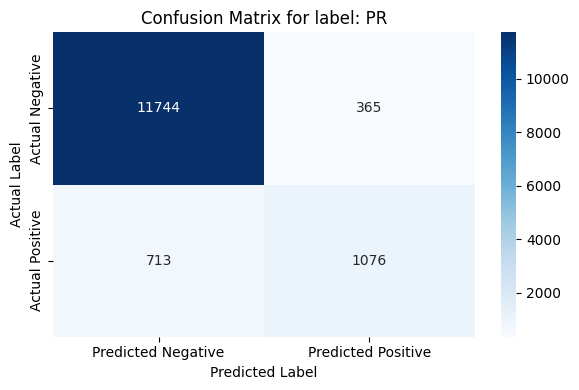

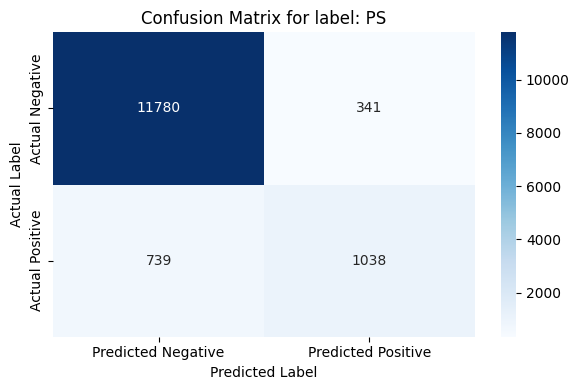

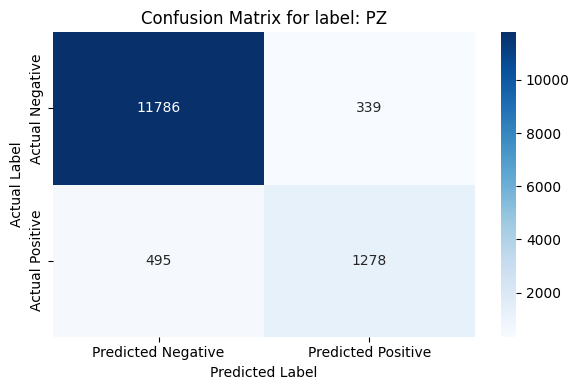

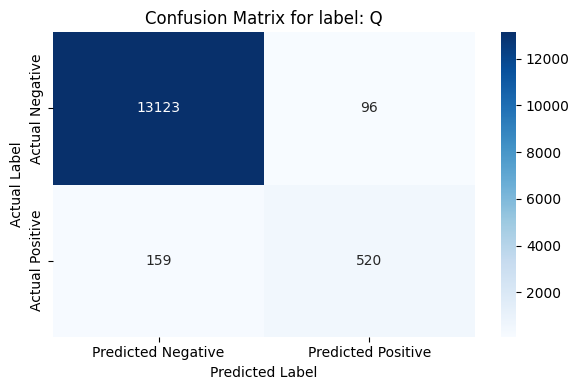

14 {'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 3000}


100%|██████████| 13898/13898 [00:02<00:00, 6246.58it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.87      0.77      0.82       693
           B       0.84      0.81      0.83      1190
           D       0.83      0.83      0.83      2920
          DI       0.86      0.75      0.80      1189
           O       0.80      0.65      0.72      1803
           P       0.91      0.94      0.92      6657
          PR       0.75      0.60      0.66      1789
          PS       0.75      0.59      0.66      1777
          PZ       0.79      0.72      0.75      1773
           Q       0.84      0.77      0.80       679

   micro avg       0.84      0.79      0.81     20470
   macro avg       0.82      0.74      0.78     20470
weighted avg       0.84      0.79      0.81     20470
 samples avg       0.81      0.79      0.79     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


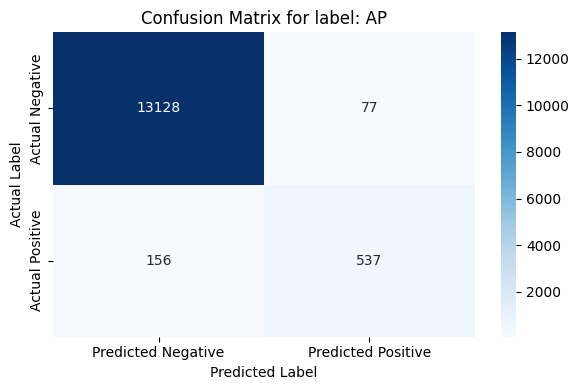

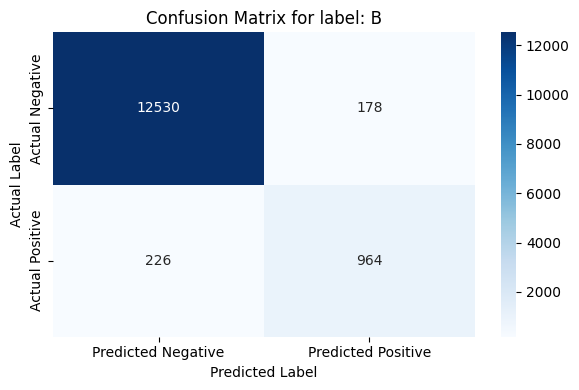

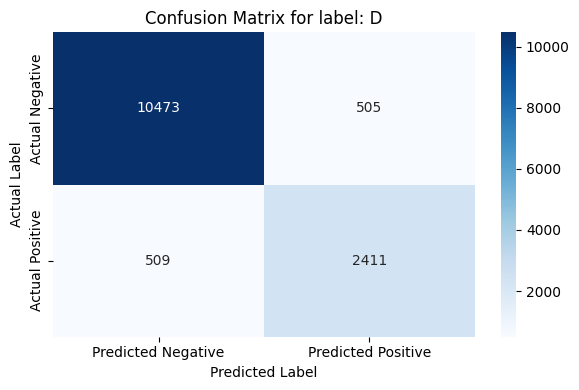

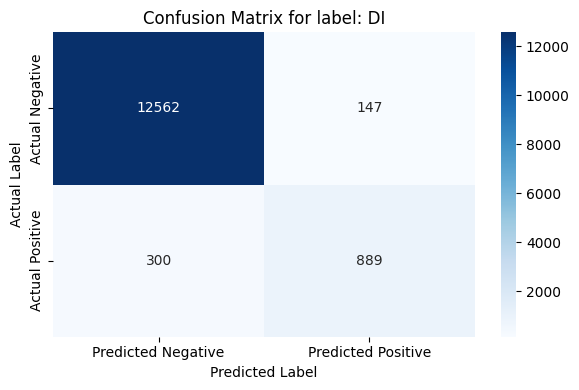

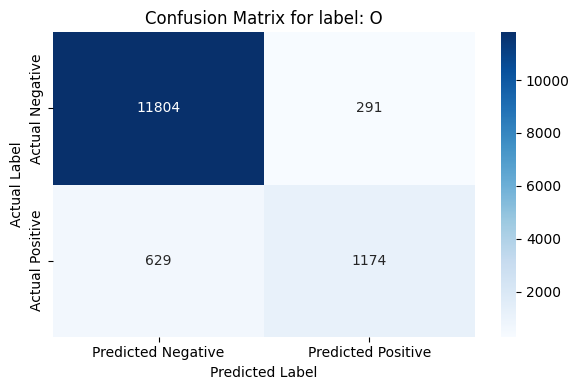

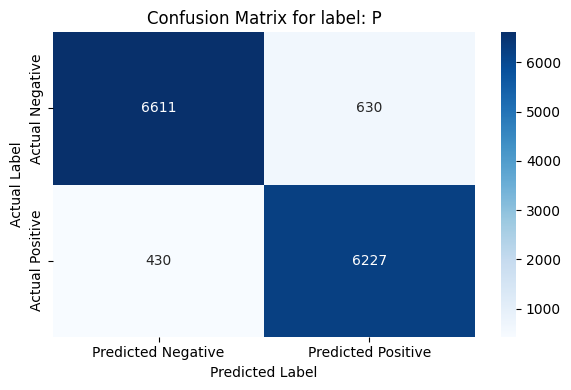

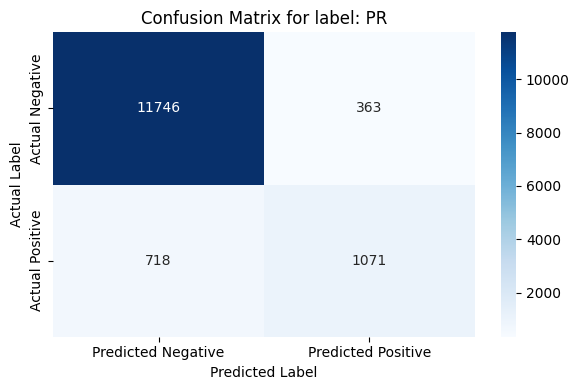

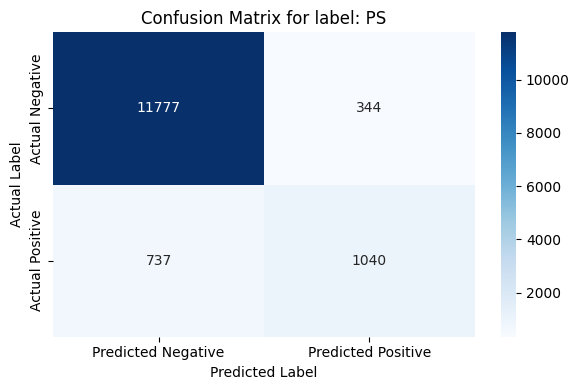

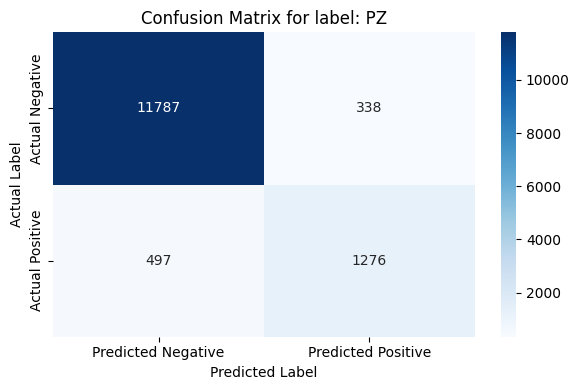

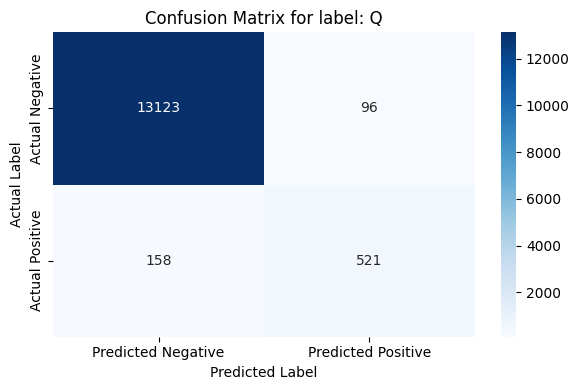

15 {'learning_rate': 0.4, 'max_depth': 7, 'n_estimators': 1000}


100%|██████████| 13898/13898 [00:02<00:00, 6362.69it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.88      0.76      0.81       693
           B       0.86      0.80      0.83      1190
           D       0.83      0.82      0.83      2920
          DI       0.86      0.73      0.79      1189
           O       0.82      0.64      0.72      1803
           P       0.91      0.93      0.92      6657
          PR       0.74      0.58      0.65      1789
          PS       0.76      0.56      0.64      1777
          PZ       0.80      0.71      0.75      1773
           Q       0.85      0.76      0.80       679

   micro avg       0.85      0.78      0.81     20470
   macro avg       0.83      0.73      0.77     20470
weighted avg       0.84      0.78      0.81     20470
 samples avg       0.81      0.78      0.78     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


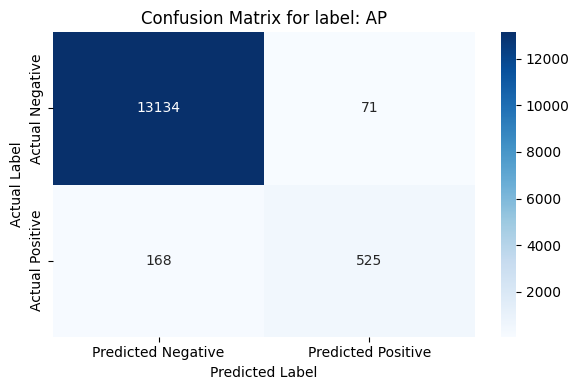

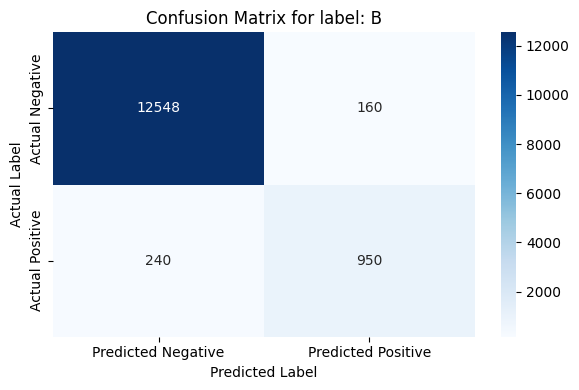

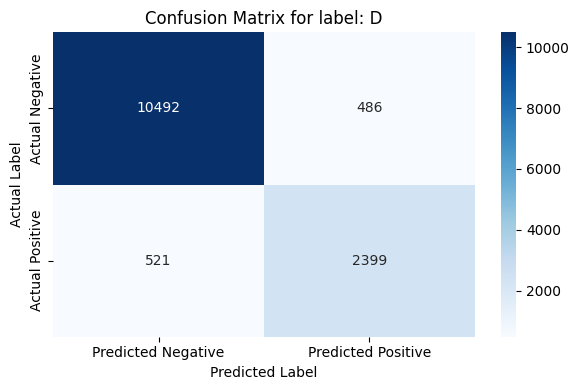

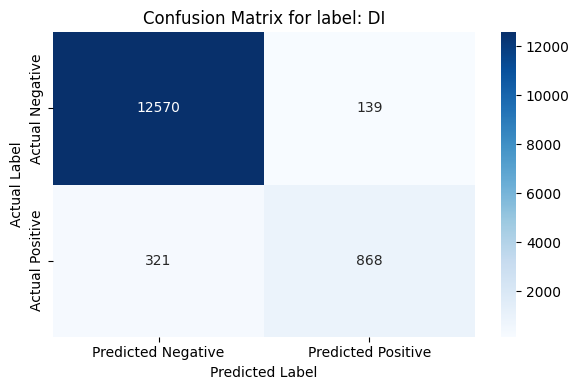

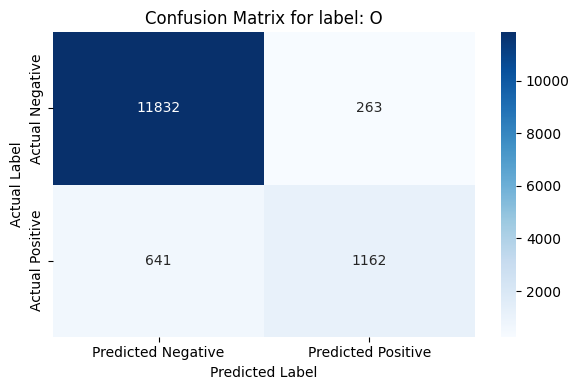

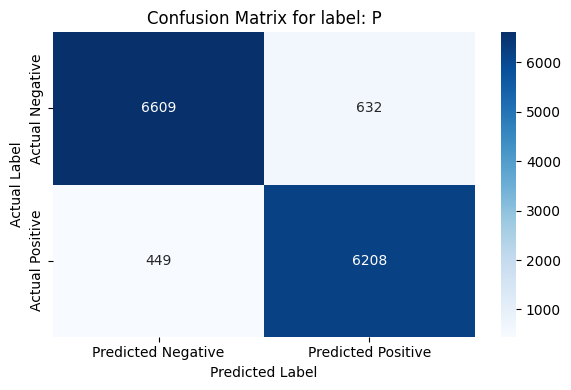

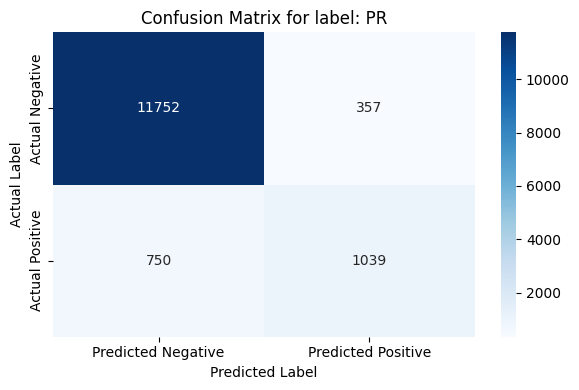

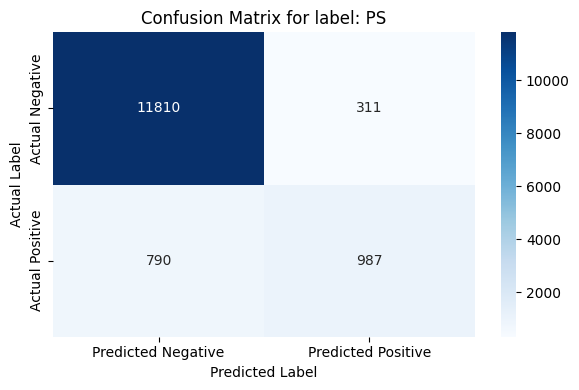

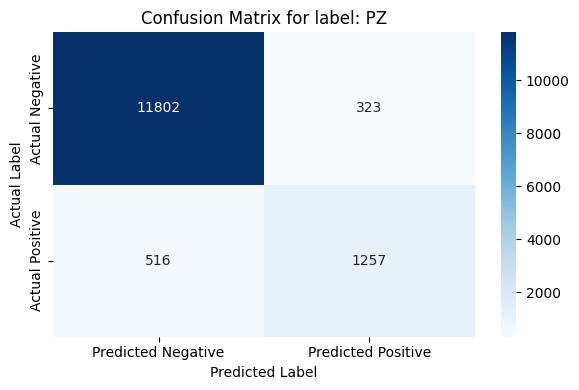

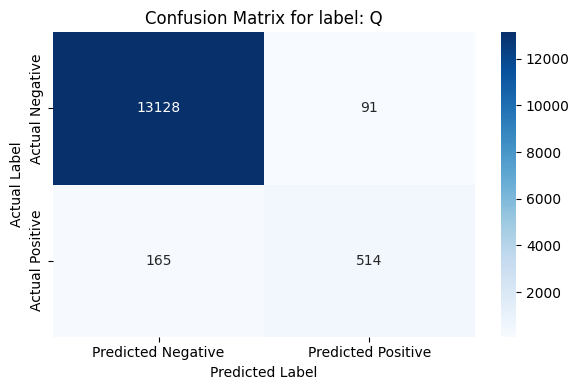

16 {'learning_rate': 0.4, 'max_depth': 7, 'n_estimators': 2000}


100%|██████████| 13898/13898 [00:02<00:00, 6376.46it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.88      0.76      0.82       693
           B       0.86      0.80      0.83      1190
           D       0.83      0.82      0.83      2920
          DI       0.86      0.73      0.79      1189
           O       0.82      0.65      0.72      1803
           P       0.91      0.93      0.92      6657
          PR       0.75      0.58      0.65      1789
          PS       0.76      0.56      0.64      1777
          PZ       0.80      0.71      0.75      1773
           Q       0.85      0.76      0.80       679

   micro avg       0.85      0.78      0.81     20470
   macro avg       0.83      0.73      0.78     20470
weighted avg       0.84      0.78      0.81     20470
 samples avg       0.81      0.78      0.78     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


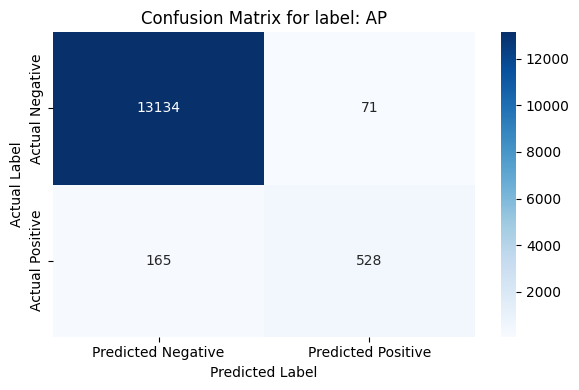

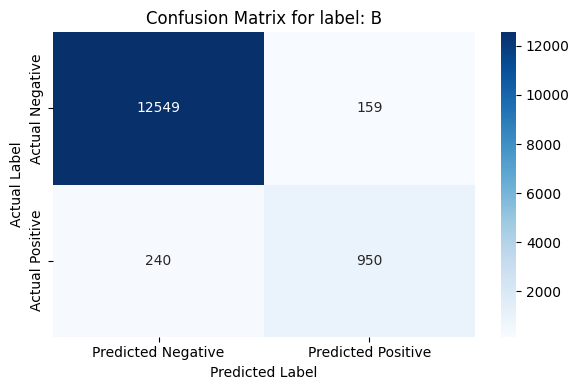

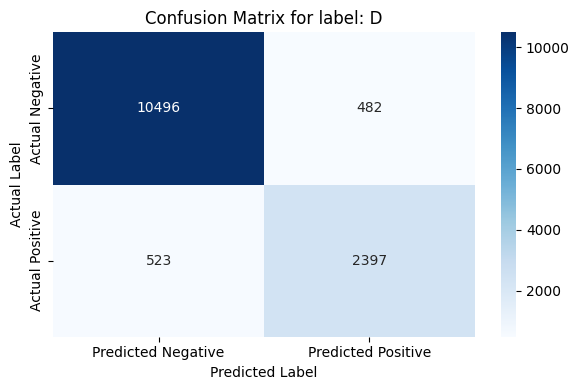

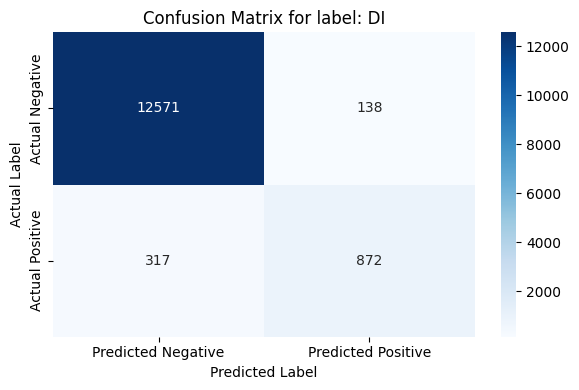

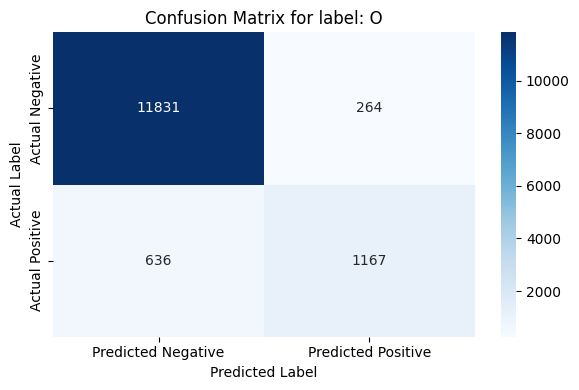

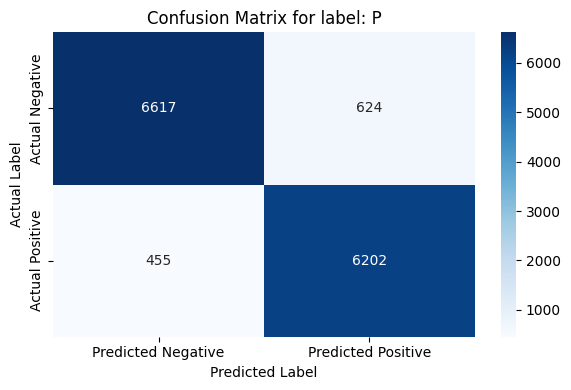

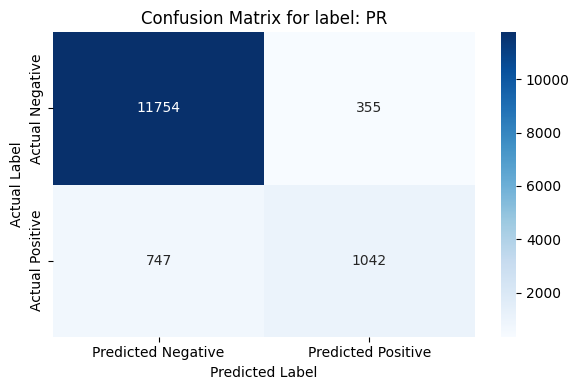

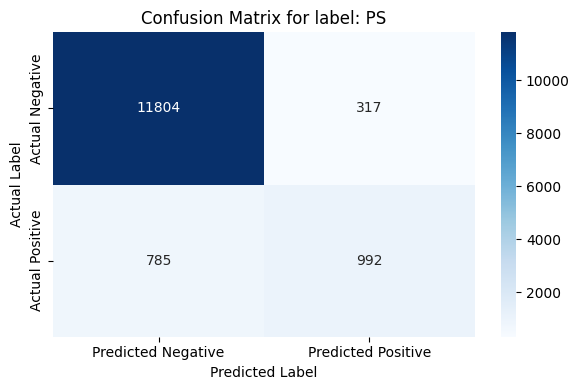

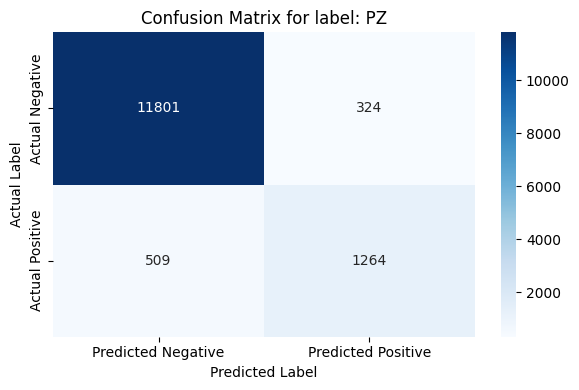

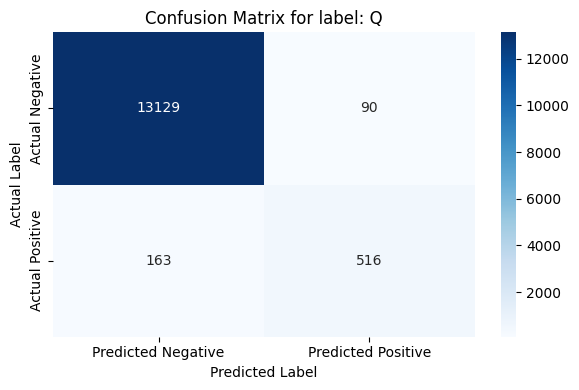

17 {'learning_rate': 0.4, 'max_depth': 7, 'n_estimators': 3000}


100%|██████████| 13898/13898 [00:02<00:00, 6260.98it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

          AP       0.88      0.76      0.82       693
           B       0.86      0.80      0.83      1190
           D       0.83      0.82      0.83      2920
          DI       0.86      0.73      0.79      1189
           O       0.81      0.65      0.72      1803
           P       0.91      0.93      0.92      6657
          PR       0.75      0.59      0.66      1789
          PS       0.76      0.56      0.64      1777
          PZ       0.80      0.72      0.75      1773
           Q       0.85      0.76      0.80       679

   micro avg       0.85      0.78      0.81     20470
   macro avg       0.83      0.73      0.78     20470
weighted avg       0.84      0.78      0.81     20470
 samples avg       0.81      0.78      0.78     20470


Multilabel Confusion Matrices (one for each label):


/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


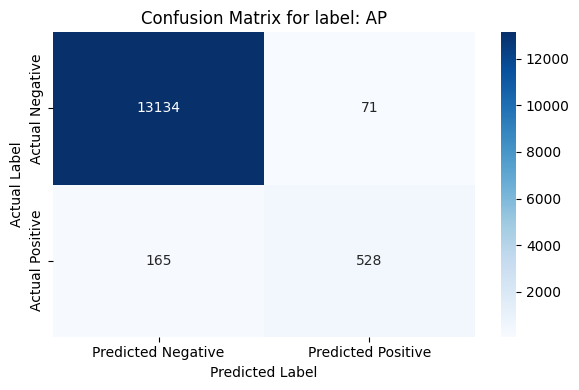

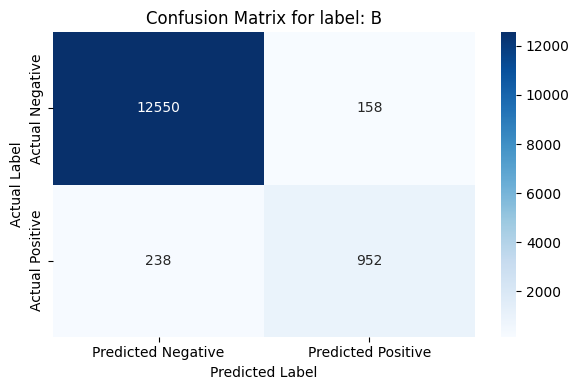

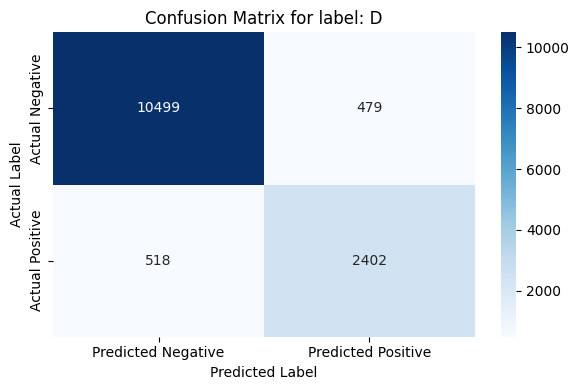

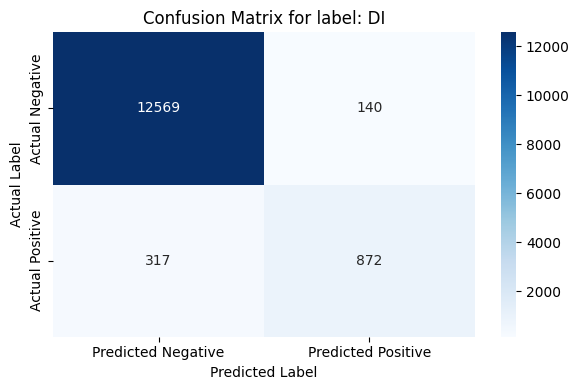

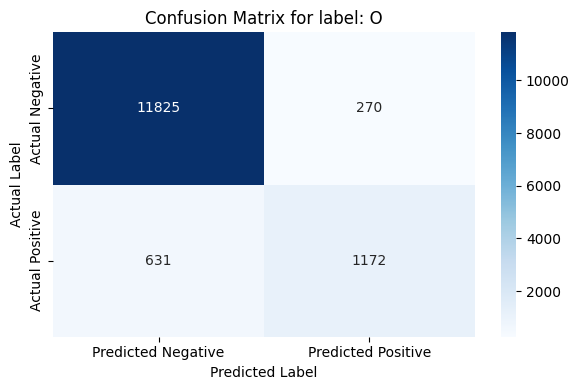

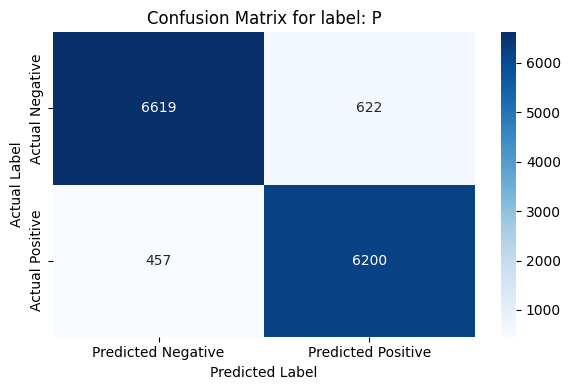

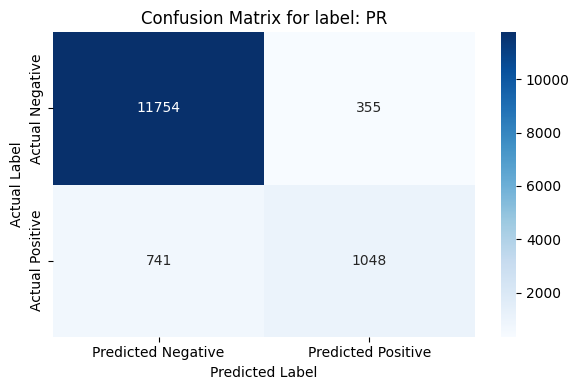

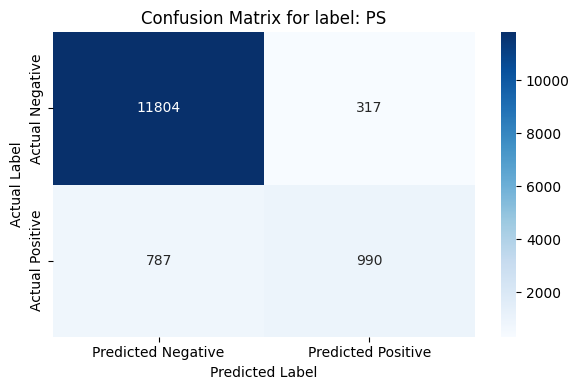

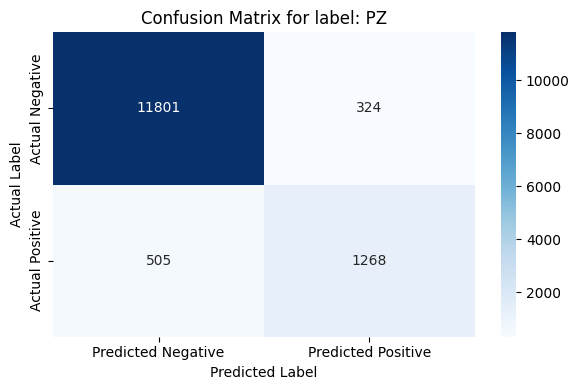

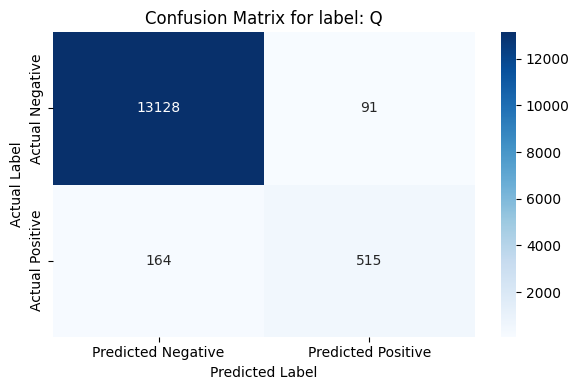

In [8]:
for i, params in enumerate(ParameterGrid(param_grid)):
    print(i, params)
    X_train_texts = np.array([get_embedding(str(num)) for num in tqdm(X_train["Etext Number"])])
    X_test_texts = np.array([get_embedding(str(num)) for num in tqdm(X_test["Etext Number"])])
   
    # models = {
    #     "tfidf": lambda: create_xgbhi_tfidf_model(labels, n_estimators=params["n_estimators"], max_depth=params["max_depth"]),
    #     "multi": lambda: create_xgbhi_multi_model(labels, n_estimators=params["n_estimators"], max_depth=params["max_depth"])
    # }

    model_name = "multi"
    # model = models[model_name]()
    model = create_xgbhi_multi_model(
        labels,
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        learning_rate=params["learning_rate"],
    )

    start_train = time.time()
    model.fit(X_train_texts, [explode_multiple_locc(locc) for locc in y_train])
    train_time = time.time() - start_train

    start_train = time.time()
    y_pred_labels = model.predict(X_test_texts)
    test_time = time.time() - start_train
    
    y_pred_bin = model["model"].transform([[i for y in ys for i in (y if isinstance(y, tuple) else [y])] for ys in y_pred_labels])

    y_test_bin = model["model"].transform([explode_multiple_locc(locc) for locc in y_test])

    f1score, name, metrics_path = calculate_flat_binary_metrics(y_test_bin, y_pred_bin, labels, "xgbhi", model_name, hyperparams=params, save=True)
    results.append((f1score, train_time, test_time, test_time / len(y_pred_bin), name))

    with (metrics_path / f"{name}.pkl").open("wb") as f:
        pickle.dump(model, f)

    

In [6]:
for f1score, train_time, test_time, test_time_avg, name in sorted(results, key=lambda x: x[0], reverse=True):
    print(round(f1score, 4), round(train_time, 4), round(test_time, 4), test_time_avg, name)

0.8131 389.4732 1.6282 0.00011715303652405584 multi_002d3d0c283f91ff93a479eb3146a7f2
0.813 370.8166 1.6015 0.00011523362800772712 multi_ed591a7ea81ad73685fe550901c02c07
0.8127 417.905 1.2454 8.96124826745003e-05 multi_3b9e612a178e691ad9c1637195cc8153
0.8127 262.2613 1.0939 7.87122693228574e-05 multi_3b9e612a178e691ad9c1637195cc8153
0.8123 280.573 1.0439 7.511506167774253e-05 multi_f36f0f25a15918ae0dc238ca7e3f70aa
0.8114 145.3561 0.5147 3.703166502193506e-05 multi_04c5787fce7f0249987c85357ac83570
0.8114 166.568 0.5419 3.898907160652612e-05 multi_04c5787fce7f0249987c85357ac83570
0.8114 146.8417 0.5124 3.686624047464219e-05 multi_04c5787fce7f0249987c85357ac83570
0.8114 150.8115 0.4556 3.2781422404114816e-05 multi_ef8ad0f3dc3355283270c553b030e837
0.8114 152.1938 0.4539 3.265866205355712e-05 multi_ef8ad0f3dc3355283270c553b030e837
0.8103 374.1732 1.5792 0.00011362829110934281 multi_f2ffe286e332049545823b5b4dbaab09
0.8099 266.0218 1.0963 7.888285749026177e-05 multi_196b50239439de535b3a07b280d

In [17]:
for f1score, train_time, test_time, test_time_avg, name in sorted(results, key=lambda x: x[0] * 10000 - x[1], reverse=True):
    print(round(f1score, 4), round(train_time, 4), round(test_time, 4), test_time_avg, name)

0.8082 79.2915 0.2247 1.617074270079609e-05 multi_3717bcad110b9c5f3e9279d4d5eacf65
0.8078 78.9475 0.204 1.467871381183514e-05 multi_d999c9fc6a180dff3f76ce6a48eb22cb
0.8079 84.1623 0.1847 1.3288756483217712e-05 multi_4501dd0837311501a670049411bc271a
0.8042 47.0913 0.1256 9.036901306292876e-06 multi_80116e95b45464ea0c034306735935d1
0.8028 49.0115 0.1301 9.360854137473903e-06 multi_e1d5f69b3123cc816f2a85dd23afef97
0.8017 40.4927 0.1029 7.402366795185093e-06 multi_4216584e4d940d2013831f1a662c74e9
0.8015 39.0471 0.1021 7.348980795892816e-06 multi_7796443ceef2e8690acb4cdd02a6dad6
0.8052 82.1409 0.1761 1.2671695302451903e-05 multi_a08a4d6ec40274677fe26ce4a73aff7e
0.8046 76.5656 0.1739 1.251237789389555e-05 multi_a530fe5e63c456109bb6582849a49393
0.8114 145.3561 0.5147 3.703166502193506e-05 multi_04c5787fce7f0249987c85357ac83570
0.8114 146.8417 0.5124 3.686624047464219e-05 multi_04c5787fce7f0249987c85357ac83570
0.8114 150.8115 0.4556 3.2781422404114816e-05 multi_ef8ad0f3dc3355283270c553b030e837

In [5]:
best_params = {
    "learning_rate": 0.2,
    "max_depth": 5,
    "n_estimators": 3000,
    "test": 2,
}

In [19]:
with open("results_xgbhi.pkl", "wb") as f:
    pickle.dump(results, f)

In [6]:
X_train_texts = np.array([get_embedding(str(num)) for num in tqdm(X_train["Etext Number"])])
X_test_texts = np.array([get_embedding(str(num)) for num in tqdm(X_test["Etext Number"])])

model_name = "multi"
model = create_xgbhi_multi_model(labels, n_estimators=best_params["n_estimators"], max_depth=best_params["max_depth"], learning_rate=best_params["learning_rate"])

model.fit(X_train_texts, [explode_multiple_locc(locc) for locc in y_train])

100%|██████████| 13898/13898 [00:03<00:00, 3723.95it/s]
/Users/oleksandr/me/repos/university/diploma/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['A'] will be ignored
  warnings.warn(


In [20]:
proba = model._XGBoostHierarchicalModel__model.models["P"].predict_proba(X_test_texts)
[y[y > 0.4].astype(int) for y in proba]

[array([], dtype=int64),
 array([0]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([0]),
 array([], dtype=int64),
 array([0]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([0]),
 array([], dtype=int64),
 array([0]),
 array([0]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([0]),
 array([0]),
 array([], dtype=int64),
 array([0]),
 array([0]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([0, 0]),
 array([], dtype=int64),
 array([0]),
 array([0]),
 array([0]),
 array([], dtype=int64),
 array([0]),
 array([0]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([0]),
 array([0, 0]),
 array([0]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([0]),
 array([0]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([0, 0]),
 arra

In [17]:
y_pred_custom

array([0, 0, 0, ..., 1, 0, 0], shape=(13898,))

In [7]:
pred = model.predict(X_test_texts)

In [8]:
test_bin = model.transform([explode_multiple_locc(locc) for locc in y_test])
pred_bin = model.transform(pred)

              precision    recall  f1-score   support

          AP       0.77      0.31      0.44       693
           B       0.82      0.68      0.74      1190
           D       0.76      0.72      0.74      2920
          DI       0.78      0.56      0.65      1189
           O       0.75      0.49      0.59      1803
           P       0.86      0.91      0.89      6657
          PR       0.62      0.41      0.50      1789
          PS       0.71      0.47      0.57      1777
          PZ       0.71      0.64      0.68      1773
           Q       0.78      0.61      0.68       679

   micro avg       0.79      0.68      0.73     20470
   macro avg       0.76      0.58      0.65     20470
weighted avg       0.78      0.68      0.72     20470
 samples avg       0.71      0.67      0.67     20470


Multilabel Confusion Matrices (one for each label):


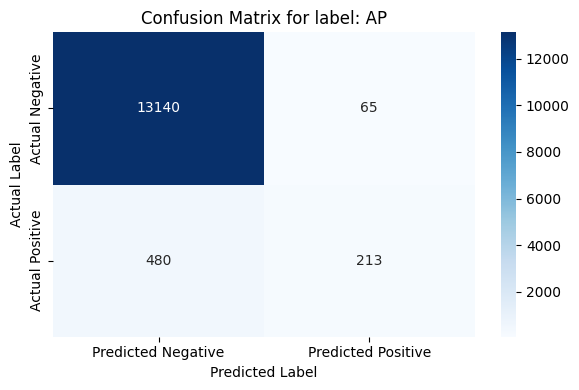

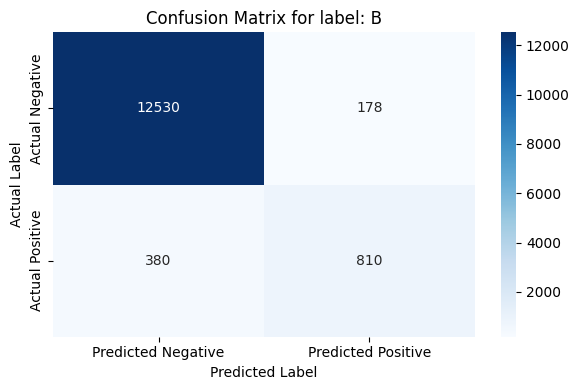

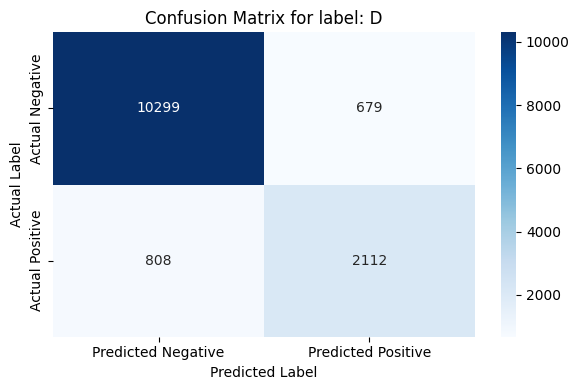

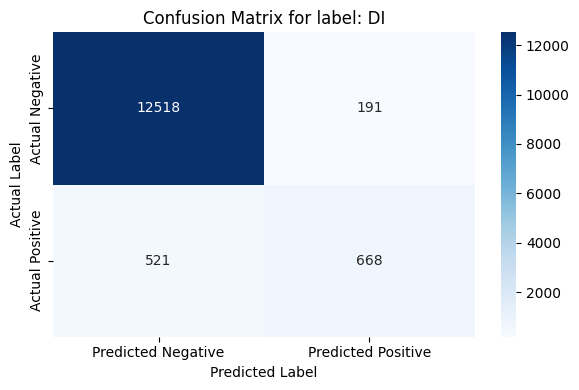

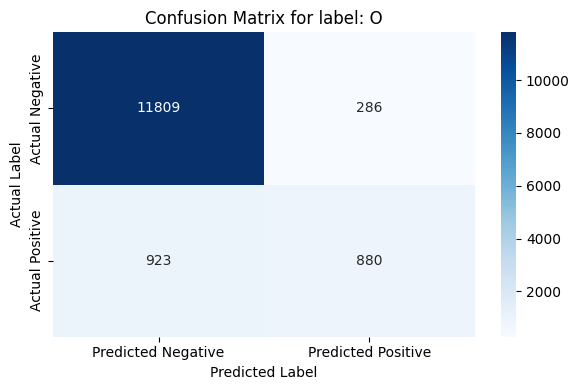

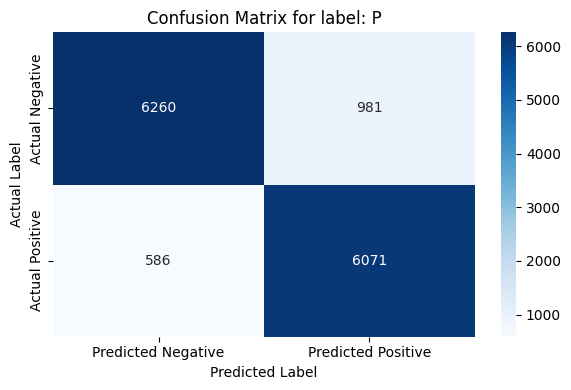

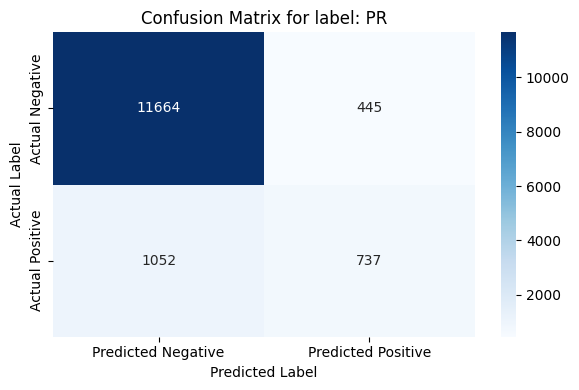

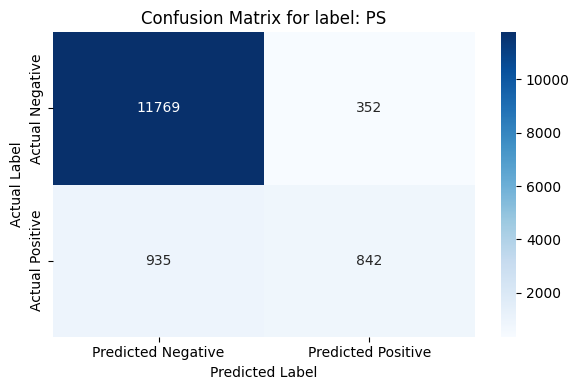

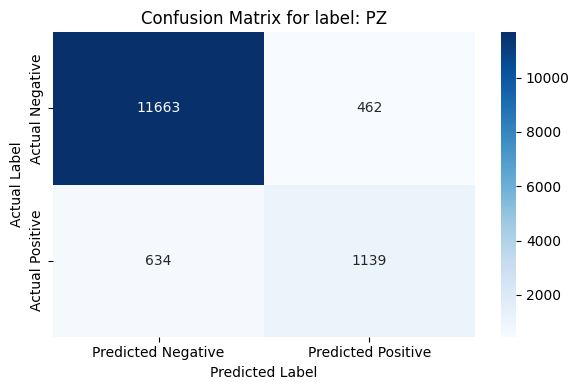

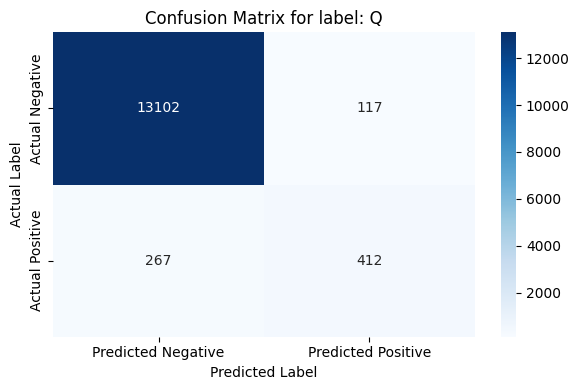

In [9]:
f1score, name, metrics_path = calculate_flat_binary_metrics(test_bin, pred_bin, labels, "xgbhi", model_name, hyperparams=best_params, save=True)

In [18]:
name

'multi_aacb6c2b0dbb44bac09efc189a9ac28c'

In [13]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)